## Figure 4

In [18]:
##load libraries
library(ggplot2)
library(ggdendro)
library(reshape2)
library(grid)
library(dplyr)   


Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Simple Stats on eQTLs

In [61]:
#filter function
filter_eQTL<-function(df,cutoff){
    #print(cutoff)
    return(length(which(df$FDR<cutoff)))
}

filter_range<-function(df,fdr_list){
    results=c()
    for(i in fdr_list){
        temp=filter_eQTL(df,i)
        results=c(results,temp)
    }
    return(results)
}

In [65]:
#load immvar eQTLs data, these are very big sets, these will take a while
immvar.eQTL.B.cells=read.table("/Users/student/Documents/YeLab/Lupus/immvar_eQTL/B.cells.all.results1.txt")
immvar.eQTL.CD4.T.cells=read.table("/Users/student/Documents/YeLab/Lupus/immvar_eQTL/CD4.T.cells.all.results1.txt")
immvar.eQTL.CD8.T.cells=read.table("/Users/student/Documents/YeLab/Lupus/immvar_eQTL/CD8.T.cells.all.results1.txt")
immvar.eQTL.CD14.Monocytes=read.table("/Users/student/Documents/YeLab/Lupus/immvar_eQTL/CD14+.Monocytes.all.results1.txt")
immvar.eQTL.Dendritic.cells=read.table("/Users/student/Documents/YeLab/Lupus/immvar_eQTL/Dendritic.cells.all.results1.txt")
immvar.eQTL.FCGR3A.Monocytes=read.table("/Users/student/Documents/YeLab/Lupus/immvar_eQTL/FCGR3A+.Monocytes.all.results1.txt")
immvar.eQTL.Megakaryocytes=read.table("/Users/student/Documents/YeLab/Lupus/immvar_eQTL/Megakaryocytes.all.results1.txt")
immvar.eQTL.NK.cells=read.table("/Users/student/Documents/YeLab/Lupus/immvar_eQTL/NK.cells.all.results1.txt")
immvar.eQTL.PBMC=read.table("/Users/student/Documents/YeLab/Lupus/immvar_eQTL/PBMC.all.results1.txt")
immvar.eQTL.Monocytes=read.table("/Users/student/Documents/YeLab/Lupus/immvar_eQTL/Monocytes.all.results1.txt")
immvar.eQTL.Lymphocytes=read.table("/Users/student/Documents/YeLab/Lupus/immvar_eQTL/Lymphocytes.all.results1.txt")


fdr_range,B.cells_res,CD4.T.cells_res,CD8.T.cells_res,CD14.Monocytes_res,Dendritic.cells_res,FCGR3A.Monocytes_res,Megakaryocytes_res,NK.cells_res,PBMC_res,Monocytes_res,Lymphocytes_res
0.01,6259,18393,4963,9544,3932,4529,1002,3925,36331,9211,6183
0.05,11615,34457,9236,19985,6534,7344,1155,6781,68069,19341,11174
0.10,17575,49482,12039,30459,9274,10342,1329,10048,97222,29019,16792
0.20,29908,80841,19460,49947,15399,18227,1859,16717,157944,47075,28311
0.30,46399,122063,31424,78389,24260,29221,2909,26929,233981,72985,43612
0.40,70540,181527,47084,112296,37334,46405,5538,42071,332646,103494,65762
0.50,107178,267515,73806,166957,61068,70425,11934,65143,458423,151063,98632
0.60,161700,392348,117275,249455,99173,118234,17170,107691,627401,219729,147126
0.70,262004,578038,191847,383046,182756,202543,30027,180985,852821,324319,231140
0.80,461187,886934,357468,625364,354147,379318,61531,364078,1155049,494672,384057


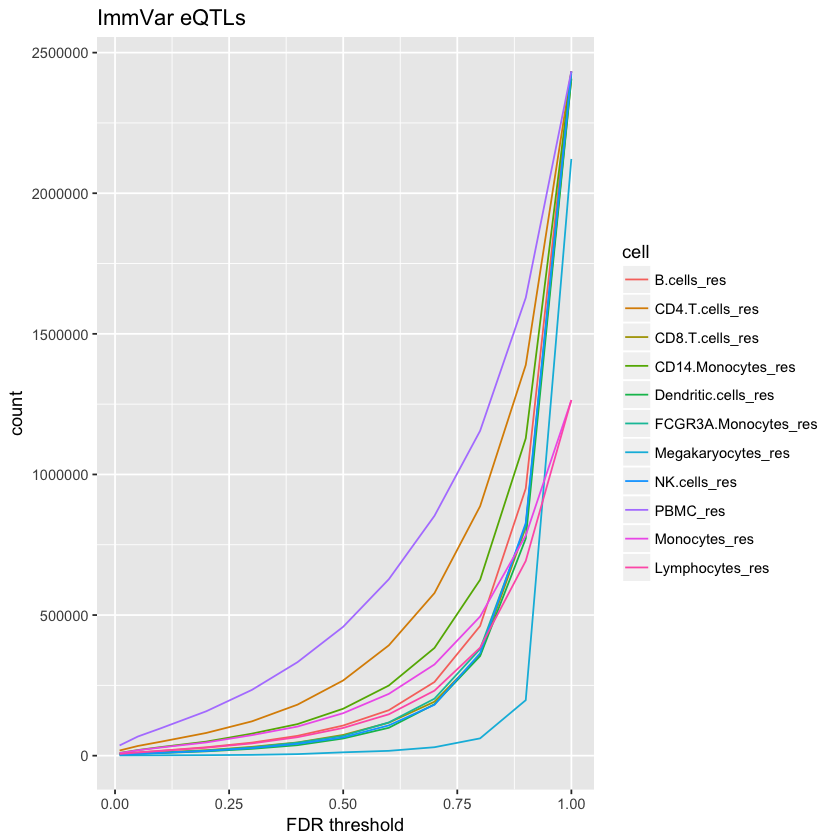

In [211]:
#analyze immvar eQTLs
fdr_range=c(0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)

lab=c("SNP","gene","beta","t.stat","p.value","FDR")
colnames(immvar.eQTL.B.cells)=lab
colnames(immvar.eQTL.CD4.T.cells)=lab
colnames(immvar.eQTL.CD8.T.cells)=lab
colnames(immvar.eQTL.CD14.Monocytes)=lab
colnames(immvar.eQTL.Dendritic.cells)=lab
colnames(immvar.eQTL.FCGR3A.Monocytes)=lab
colnames(immvar.eQTL.Megakaryocytes)=lab
colnames(immvar.eQTL.NK.cells)=lab
colnames(immvar.eQTL.PBMC)=lab
colnames(immvar.eQTL.Monocytes)=lab
colnames(immvar.eQTL.Lymphocytes)=lab

B.cells_res=filter_range(immvar.eQTL.B.cells,fdr_range)
CD4.T.cells_res=filter_range(immvar.eQTL.CD4.T.cells,fdr_range)
CD8.T.cells_res=filter_range(immvar.eQTL.CD8.T.cells,fdr_range)
CD14.Monocytes_res=filter_range(immvar.eQTL.CD14.Monocytes,fdr_range)
Dendritic.cells_res=filter_range(immvar.eQTL.Dendritic.cells,fdr_range)
FCGR3A.Monocytes_res=filter_range(immvar.eQTL.FCGR3A.Monocytes,fdr_range)
Megakaryocytes_res=filter_range(immvar.eQTL.Megakaryocytes,fdr_range)
NK.cells_res=filter_range(immvar.eQTL.NK.cells,fdr_range)
PBMC_res=filter_range(immvar.eQTL.PBMC,fdr_range)
Monocytes_res=filter_range(immvar.eQTL.Monocytes,fdr_range)
Lymphocytes_res=filter_range(immvar.eQTL.Lymphocytes,fdr_range)

Immvar.all=data.frame(cbind(fdr_range,B.cells_res,CD4.T.cells_res,CD8.T.cells_res,CD14.Monocytes_res,Dendritic.cells_res,FCGR3A.Monocytes_res,Megakaryocytes_res,NK.cells_res,PBMC_res,Monocytes_res,Lymphocytes_res))
Immvar.all    

Immvar.all_unrolled=melt(Immvar.all, id.vars="fdr_range", measure.vars=c("B.cells_res","CD4.T.cells_res","CD8.T.cells_res","CD14.Monocytes_res","Dendritic.cells_res","FCGR3A.Monocytes_res","Megakaryocytes_res","NK.cells_res","PBMC_res","Monocytes_res","Lymphocytes_res"), value.name = "count",variable.name="cell")

ggplot(Immvar.all_unrolled,aes(x=fdr_range,y=count, color=cell))+geom_line()+ggtitle(paste("ImmVar eQTLs"))+xlab("FDR threshold")



In [26]:
#remove large data frames to make space
rm(immvar.eQTL.B.cells)
rm(immvar.eQTL.CD4.T.cells)
rm(immvar.eQTL.CD8.T.cells)
rm(immvar.eQTL.CD14.Monocytes)
rm(immvar.eQTL.Dendritic.cells)
rm(immvar.eQTL.FCGR3A.Monocytes)
rm(immvar.eQTL.Megakaryocytes)
rm(immvar.eQTL.NK.cells)
rm(immvar.eQTL.PBMC)
rm(immvar.eQTL.Monocytes)
rm(immvar.eQTL.Lymphocytes)

Warning message in rm(immvar.eQTL.B.cells):
“object 'immvar.eQTL.B.cells' not found”Warning message in rm(immvar.eQTL.CD4.T.cells):
“object 'immvar.eQTL.CD4.T.cells' not found”Warning message in rm(immvar.eQTL.CD8.T.cells):
“object 'immvar.eQTL.CD8.T.cells' not found”Warning message in rm(immvar.eQTL.CD14.Monocytes):
“object 'immvar.eQTL.CD14.Monocytes' not found”Warning message in rm(immvar.eQTL.Dendritic.cells):
“object 'immvar.eQTL.Dendritic.cells' not found”Warning message in rm(immvar.eQTL.FCGR3A.Monocytes):
“object 'immvar.eQTL.FCGR3A.Monocytes' not found”Warning message in rm(immvar.eQTL.Megakaryocytes):
“object 'immvar.eQTL.Megakaryocytes' not found”Warning message in rm(immvar.eQTL.NK.cells):
“object 'immvar.eQTL.NK.cells' not found”Warning message in rm(immvar.eQTL.PBMC):
“object 'immvar.eQTL.PBMC' not found”Warning message in rm(immvar.eQTL.Monocytes):
“object 'immvar.eQTL.Monocytes' not found”Warning message in rm(immvar.eQTL.Lymphocytes):
“object 'immvar.eQTL.Lymphocytes' 

In [57]:
#load SLE eQTLs data, these are very big sets, only load one at a time and then remove, these will take a while
SLE.eQTL.B.cells=read.table("/Users/student/Documents/YeLab/Lupus/SLE_eQTL/B.cells.all.results1.txt",header=TRUE)
SLE.eQTL.CD4.T.cells=read.table("/Users/student/Documents/YeLab/Lupus/SLE_eQTL/CD4.T.cells.all.results1.txt",header=TRUE)
SLE.eQTL.CD8.T.cells=read.table("/Users/student/Documents/YeLab/Lupus/SLE_eQTL/CD8.T.cells.all.results1.txt",header=TRUE)
SLE.eQTL.CD14.Monocytes=read.table("/Users/student/Documents/YeLab/Lupus/SLE_eQTL/CD14+.Monocytes.all.results1.txt",header=TRUE)
SLE.eQTL.Dendritic.cells=read.table("/Users/student/Documents/YeLab/Lupus/SLE_eQTL/Dendritic.cells.all.results1.txt",header=TRUE)
SLE.eQTL.FCGR3A.Monocytes=read.table("/Users/student/Documents/YeLab/Lupus/SLE_eQTL/FCGR3A+.Monocytes.all.results1.txt",header=TRUE)
SLE.eQTL.Megakaryocytes=read.table("/Users/student/Documents/YeLab/Lupus/SLE_eQTL/Megakaryocytes.all.results1.txt",header=TRUE)
SLE.eQTL.NK.cells=read.table("/Users/student/Documents/YeLab/Lupus/SLE_eQTL/NK.cells.all.results1.txt",header=TRUE)
SLE.eQTL.PBMC=read.table("/Users/student/Documents/YeLab/Lupus/SLE_eQTL/PBMC.all.results1.txt",header=TRUE)
SLE.eQTL.Monocytes=read.table("/Users/student/Documents/YeLab/Lupus/SLE_eQTL/Monocytes.all.results1.txt",header=TRUE)
SLE.eQTL.Lymphocytes=read.table("/Users/student/Documents/YeLab/Lupus/SLE_eQTL/Lymphocytes.all.results1.txt",header=TRUE)


fdr_range,B.cells_res,CD4.T.cells_res,CD8.T.cells_res,CD14.Monocytes_res,Dendritic.cells_res,FCGR3A.Monocytes_res,Megakaryocytes_res,NK.cells_res,PBMC_res,Monocytes_res,Lymphocytes_res
0.01,18080,42447,21097,62198,12441,27125,5462,16746,110918,57858,40412
0.05,29920,69049,34983,104079,19444,43378,7445,27234,178314,94797,64912
0.10,41457,94676,49617,138099,25737,58271,9896,37723,236100,124769,88123
0.20,67283,143888,80239,208560,39110,87504,15398,61543,339543,184586,131611
0.30,97147,207630,119598,290266,57061,124587,21618,94742,452001,250164,185491
0.40,144444,281468,176198,390661,79521,172355,32140,138198,581229,327681,245382
0.50,209688,378956,259841,513551,114092,240711,48099,197591,732314,415309,321806
0.60,303376,520224,373229,675209,179900,341765,75050,292632,914462,521900,423661
0.70,456328,713576,544129,900040,287919,500704,126450,448833,1144366,657648,549812
0.80,719266,1033178,827768,1214372,503688,774609,252430,718128,1452746,819940,732752


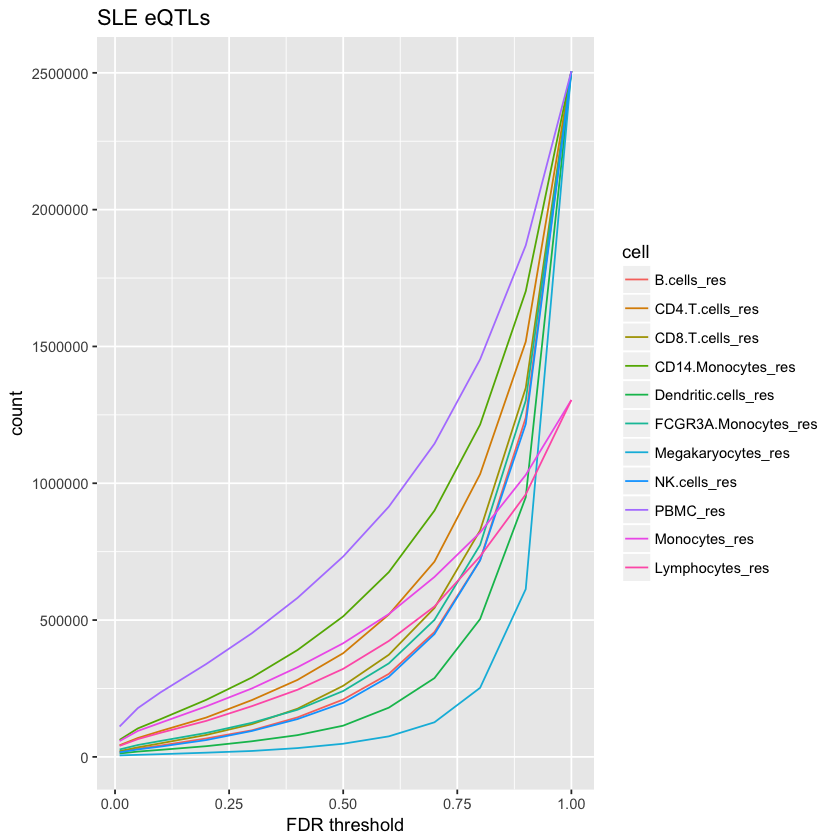

In [213]:
#analyze SLE eQTLs
lab=c("SNP","gene","beta","t.stat","p.value","FDR")
colnames(SLE.eQTL.B.cells)=lab
colnames(SLE.eQTL.CD4.T.cells)=lab
colnames(SLE.eQTL.CD8.T.cells)=lab
colnames(SLE.eQTL.CD14.Monocytes)=lab
colnames(SLE.eQTL.Dendritic.cells)=lab
colnames(SLE.eQTL.FCGR3A.Monocytes)=lab
colnames(SLE.eQTL.Megakaryocytes)=lab
colnames(SLE.eQTL.NK.cells)=lab
colnames(SLE.eQTL.PBMC)=lab
colnames(SLE.eQTL.Monocytes)=lab
colnames(SLE.eQTL.Lymphocytes)=lab

fdr_range=c(0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
B.cells_res=filter_range(SLE.eQTL.B.cells,fdr_range)
CD4.T.cells_res=filter_range(SLE.eQTL.CD4.T.cells,fdr_range)
CD8.T.cells_res=filter_range(SLE.eQTL.CD8.T.cells,fdr_range)
CD14.Monocytes_res=filter_range(SLE.eQTL.CD14.Monocytes,fdr_range)
Dendritic.cells_res=filter_range(SLE.eQTL.Dendritic.cells,fdr_range)
FCGR3A.Monocytes_res=filter_range(SLE.eQTL.FCGR3A.Monocytes,fdr_range)
Megakaryocytes_res=filter_range(SLE.eQTL.Megakaryocytes,fdr_range)
NK.cells_res=filter_range(SLE.eQTL.NK.cells,fdr_range)
PBMC_res=filter_range(SLE.eQTL.PBMC,fdr_range)
Monocytes_res=filter_range(SLE.eQTL.Monocytes,fdr_range)
Lymphocytes_res=filter_range(SLE.eQTL.Lymphocytes,fdr_range)



SLE.all=data.frame(cbind(fdr_range,B.cells_res,CD4.T.cells_res,CD8.T.cells_res,CD14.Monocytes_res,Dendritic.cells_res,FCGR3A.Monocytes_res,Megakaryocytes_res,NK.cells_res,PBMC_res,Monocytes_res,Lymphocytes_res))
SLE.all    

SLE.all_unrolled=melt(SLE.all, id.vars="fdr_range", measure.vars=c("B.cells_res","CD4.T.cells_res","CD8.T.cells_res","CD14.Monocytes_res","Dendritic.cells_res","FCGR3A.Monocytes_res","Megakaryocytes_res","NK.cells_res","PBMC_res","Monocytes_res","Lymphocytes_res"), value.name = "count",variable.name="cell")

ggplot(SLE.all_unrolled,aes(x=fdr_range,y=count, color=cell))+geom_line()+ggtitle(paste("SLE eQTLs"))+xlab("FDR threshold")


## look at meta (shared effects) and cochran Q (heterogeneous effects) SLE/Healthy per cell type

In [4]:
# read data from /ye/yelabstore2/gracieg/scimmvar/eqtls/v1.10pcs/meta.disease/
library("data.table")
B.cells_meta=fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/B.cells.meta.analysis")
CD14.Monocytes_meta=fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/CD14+.Monocytes.meta.analysis")
CD4.T.cells_meta=fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/CD4.T.cells.meta.analysis")
CD8.T.cells_meta=fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/CD8.T.cells.meta.analysis")
Dendritic.cells_meta=fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/Dendritic.cells.meta.analysis")
FCGR3A.Monocytes_meta=fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/FCGR3A+.Monocytes.meta.analysis")
Megakaryocytes_meta=fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/Megakaryocytes.meta.analysis")
NK.cells_meta=fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/NK.cells.meta.analysis")
PBMC_meta=fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/PBMC.meta.analysis")


Warning message in fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/B.cells.meta.analysis"):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: RSID	#STUDY	PVALUE_FE	BETA_FE	STD_FE	PVALUE_RE	BETA_RE	STD_RE	PVALUE_RE2	STAT1_RE2	STAT2_RE2	PVALUE_BE	I_SQUARE	Q	PVALUE_Q	TAU_SQUARE	PVALUES_OF_STUDIES(Tab_delimitered)	MVALUES_OF_STUDIES(Tab_delimitered)”

Read 2506068 rows and 21 (of 21) columns from 0.372 GB file in 00:00:06


Warning message in fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/CD14+.Monocytes.meta.analysis"):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: RSID	#STUDY	PVALUE_FE	BETA_FE	STD_FE	PVALUE_RE	BETA_RE	STD_RE	PVALUE_RE2	STAT1_RE2	STAT2_RE2	PVALUE_BE	I_SQUARE	Q	PVALUE_Q	TAU_SQUARE	PVALUES_OF_STUDIES(Tab_delimitered)	MVALUES_OF_STUDIES(Tab_delimitered)”

Read 2506068 rows and 21 (of 21) columns from 0.373 GB file in 00:00:06


Warning message in fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/CD4.T.cells.meta.analysis"):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: RSID	#STUDY	PVALUE_FE	BETA_FE	STD_FE	PVALUE_RE	BETA_RE	STD_RE	PVALUE_RE2	STAT1_RE2	STAT2_RE2	PVALUE_BE	I_SQUARE	Q	PVALUE_Q	TAU_SQUARE	PVALUES_OF_STUDIES(Tab_delimitered)	MVALUES_OF_STUDIES(Tab_delimitered)”

Read 0.0% of 2506068 rows

Warning message in fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/CD4.T.cells.meta.analysis"):
“C function strtod() returned ERANGE for one or more fields. The first was string input '8.00884E-311'. It was read using (double)strtold() as numeric value 8.0088399999998934E-311 (displayed here using %.16E); loss of accuracy likely occurred. This message is designed to tell you exactly what has been done by fread's C code, so you can search yourself online for many references about double precision accuracy and these specific C functions. You may wish to use colClasses to read the column as character instead and then coerce that column using the Rmpfr package for greater accuracy.”

Read 2506068 rows and 21 (of 21) columns from 0.373 GB file in 00:00:06


Warning message in fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/CD8.T.cells.meta.analysis"):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: RSID	#STUDY	PVALUE_FE	BETA_FE	STD_FE	PVALUE_RE	BETA_RE	STD_RE	PVALUE_RE2	STAT1_RE2	STAT2_RE2	PVALUE_BE	I_SQUARE	Q	PVALUE_Q	TAU_SQUARE	PVALUES_OF_STUDIES(Tab_delimitered)	MVALUES_OF_STUDIES(Tab_delimitered)”

Read 2506068 rows and 21 (of 21) columns from 0.372 GB file in 00:00:07


Warning message in fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/Dendritic.cells.meta.analysis"):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: RSID	#STUDY	PVALUE_FE	BETA_FE	STD_FE	PVALUE_RE	BETA_RE	STD_RE	PVALUE_RE2	STAT1_RE2	STAT2_RE2	PVALUE_BE	I_SQUARE	Q	PVALUE_Q	TAU_SQUARE	PVALUES_OF_STUDIES(Tab_delimitered)	MVALUES_OF_STUDIES(Tab_delimitered)”

Read 2506068 rows and 21 (of 21) columns from 0.371 GB file in 00:00:06


Warning message in fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/FCGR3A+.Monocytes.meta.analysis"):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: RSID	#STUDY	PVALUE_FE	BETA_FE	STD_FE	PVALUE_RE	BETA_RE	STD_RE	PVALUE_RE2	STAT1_RE2	STAT2_RE2	PVALUE_BE	I_SQUARE	Q	PVALUE_Q	TAU_SQUARE	PVALUES_OF_STUDIES(Tab_delimitered)	MVALUES_OF_STUDIES(Tab_delimitered)”

Read 2506068 rows and 21 (of 21) columns from 0.372 GB file in 00:00:07


Warning message in fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/Megakaryocytes.meta.analysis"):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: RSID	#STUDY	PVALUE_FE	BETA_FE	STD_FE	PVALUE_RE	BETA_RE	STD_RE	PVALUE_RE2	STAT1_RE2	STAT2_RE2	PVALUE_BE	I_SQUARE	Q	PVALUE_Q	TAU_SQUARE	PVALUES_OF_STUDIES(Tab_delimitered)	MVALUES_OF_STUDIES(Tab_delimitered)”

Read 2506068 rows and 21 (of 21) columns from 0.370 GB file in 00:00:06


Warning message in fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/NK.cells.meta.analysis"):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: RSID	#STUDY	PVALUE_FE	BETA_FE	STD_FE	PVALUE_RE	BETA_RE	STD_RE	PVALUE_RE2	STAT1_RE2	STAT2_RE2	PVALUE_BE	I_SQUARE	Q	PVALUE_Q	TAU_SQUARE	PVALUES_OF_STUDIES(Tab_delimitered)	MVALUES_OF_STUDIES(Tab_delimitered)”

Read 2506068 rows and 21 (of 21) columns from 0.372 GB file in 00:00:05


Warning message in fread("/Users/student/Documents/YeLab/Lupus/full_meta_disease/PBMC.meta.analysis"):
“Starting data input on line 2 and discarding line 1 because it has too few or too many items to be column names or data: RSID	#STUDY	PVALUE_FE	BETA_FE	STD_FE	PVALUE_RE	BETA_RE	STD_RE	PVALUE_RE2	STAT1_RE2	STAT2_RE2	PVALUE_BE	I_SQUARE	Q	PVALUE_Q	TAU_SQUARE	PVALUES_OF_STUDIES(Tab_delimitered)	MVALUES_OF_STUDIES(Tab_delimitered)”

Read 2506068 rows and 21 (of 21) columns from 0.375 GB file in 00:00:07


In [14]:
#functions to get most 
fdr_Q_FE<-function(df,fdr_list){
    df$Qfdr=p.adjust(df$V15, method = "fdr")
    df$FEfdr=p.adjust(df$V4, method = "fdr")
    #lab=c("fdr_range","B.cells","CD4.T.cells","CD8.T.cells","CD14.Monocytes","Dendritic.cells","FCGR3A.Monocytes","Megakaryocytes","NK.cells","PBMC")
    Q=filter_rangeQ(df,fdr_list)
    FE=filter_rangeFE(df,fdr_list)
    #colnames(Q)=lab
    #colnames(FE)=lab
    res=list(Q,FE)
    return(res)
}

#filter function
filter_fdrQ<-function(df,cutoff){
    return(length(which(df$Qfdr<cutoff)))
}
filter_fdrFE<-function(df,cutoff){
    return(length(which(df$FEfdr<cutoff)))
}

filter_rangeQ<-function(df,fdr_list){
    results=c()
    for(i in fdr_list){
        temp=filter_fdrQ(df,i)
        results=c(results,temp)
    }
    return(results)
}
filter_rangeFE<-function(df,fdr_list){
    results=c()
    for(i in fdr_list){
        temp=filter_fdrFE(df,i)
        results=c(results,temp)
    }
    return(results)
}

[1] "Q"


fdr_range,B.cells,CD4.T.cells,CD8.T.cells,CD14.Monocytes,Dendritic.cells,FCGR3A.Monocytes,Megakaryocytes,NK.cells,PBMC
0.01,115,181,43,0,1,44,59,36,414
0.05,265,237,316,30,11,74,63,138,1046
0.10,606,335,566,147,19,119,100,334,2097
0.20,852,611,1102,852,84,518,211,1138,5086
0.30,1699,2390,2471,1429,331,910,329,1979,8013
0.40,3946,5509,5968,2479,560,2600,478,3639,14341
0.50,7866,11255,10390,3938,2043,11739,1319,6578,24714
0.60,13850,24291,20336,6916,6809,22090,2652,13380,48390
0.70,23913,49522,39953,19147,11871,42358,13509,32028,106422
0.80,51653,119944,87108,64983,35248,80985,53159,70709,236826


[1] "FE"


fdr_range,B.cells,CD4.T.cells,CD8.T.cells,CD14.Monocytes,Dendritic.cells,FCGR3A.Monocytes,Megakaryocytes,NK.cells,PBMC
0.01,1276842,1308842,1317223,1294362,1275685,1295233,1241833,1286142,1353239
0.05,2015668,2045272,2066590,2031183,1991214,2017987,1880374,2013008,2058599
0.10,2172830,2166749,2173645,2174699,2172249,2168946,2152233,2173123,2163074
0.20,2193414,2191539,2193450,2193991,2193817,2191634,2190457,2193827,2190343
0.30,2196202,2195415,2196575,2196218,2196055,2195190,2192473,2196357,2195090
0.40,2197037,2196595,2197288,2196956,2196593,2196227,2192813,2196917,2196387
0.50,2197418,2196930,2197554,2197316,2197215,2196658,2192950,2197206,2196986
0.60,2197565,2197136,2197683,2197494,2197333,2196940,2193080,2197329,2197312
0.70,2197953,2197285,2197748,2197563,2197393,2197153,2193496,2197560,2197434
0.80,2198082,2197663,2197772,2197914,2197467,2197578,2193536,2197714,2197544


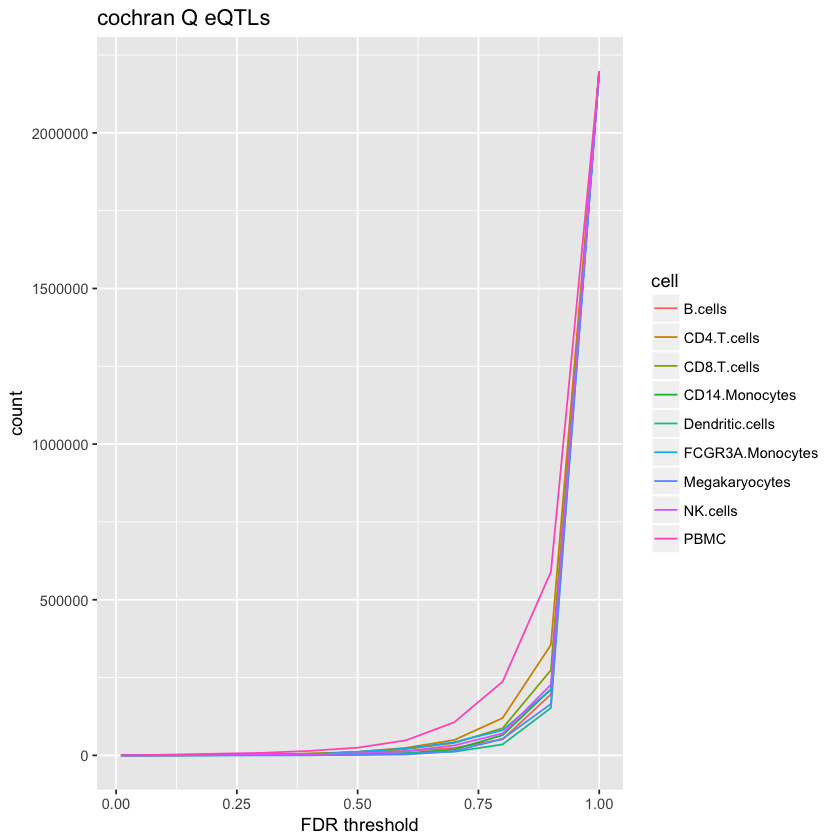

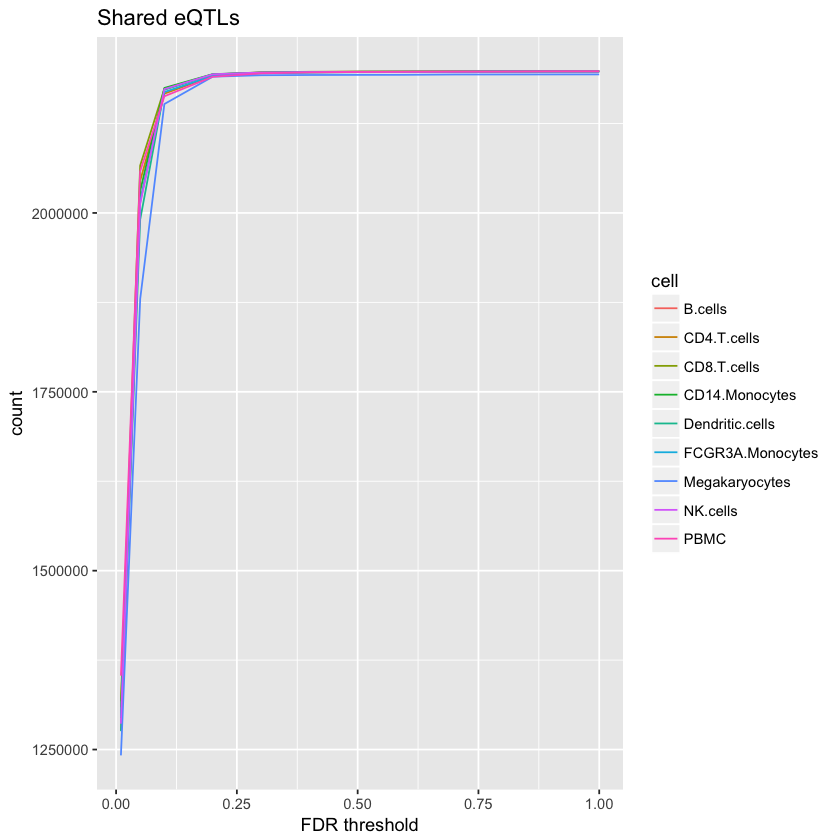

In [20]:
fdr_range=c(0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)
B.cells_fdr_results=fdr_Q_FE(B.cells_meta,fdr_range)
CD14.Monocytes_fdr_results=fdr_Q_FE(CD14.Monocytes_meta,fdr_range)
CD4.T.cells_fdr_results=fdr_Q_FE(CD4.T.cells_meta,fdr_range)
CD8.T.cells_fdr_results=fdr_Q_FE(CD8.T.cells_meta,fdr_range)
Dendritic.cells_fdr_results=fdr_Q_FE(Dendritic.cells_meta,fdr_range)
FCGR3A.Monocytes_fdr_results=fdr_Q_FE(FCGR3A.Monocytes_meta,fdr_range)
Megakaryocytes_fdr_results=fdr_Q_FE(Megakaryocytes_meta,fdr_range)
NK.cells_fdr_results=fdr_Q_FE(NK.cells_meta,fdr_range)
PBMC_fdr_results=fdr_Q_FE(PBMC_meta,fdr_range)
lab=c("fdr_range","B.cells","CD4.T.cells","CD8.T.cells","CD14.Monocytes","Dendritic.cells","FCGR3A.Monocytes","Megakaryocytes","NK.cells","PBMC")



Q.all=data.frame(cbind(fdr_range,B.cells_fdr_results[[1]],CD14.Monocytes_fdr_results[[1]],CD4.T.cells_fdr_results[[1]],CD8.T.cells_fdr_results[[1]],Dendritic.cells_fdr_results[[1]],FCGR3A.Monocytes_fdr_results[[1]],Megakaryocytes_fdr_results[[1]],NK.cells_fdr_results[[1]],PBMC_fdr_results[[1]]))
colnames(Q.all)=lab
FE.all=data.frame(cbind(fdr_range,B.cells_fdr_results[[2]],CD14.Monocytes_fdr_results[[2]],CD4.T.cells_fdr_results[[2]],CD8.T.cells_fdr_results[[2]],Dendritic.cells_fdr_results[[2]],FCGR3A.Monocytes_fdr_results[[2]],Megakaryocytes_fdr_results[[2]],NK.cells_fdr_results[[2]],PBMC_fdr_results[[2]]))
colnames(FE.all)=lab

print("Q")
Q.all
print("FE")
FE.all

Q.all_unrolled=melt(Q.all, id.vars="fdr_range", measure.vars=c("B.cells","CD4.T.cells","CD8.T.cells","CD14.Monocytes","Dendritic.cells","FCGR3A.Monocytes","Megakaryocytes","NK.cells","PBMC"), value.name = "count",variable.name="cell")
FE.all_unrolled=melt(FE.all, id.vars="fdr_range", measure.vars=c("B.cells","CD4.T.cells","CD8.T.cells","CD14.Monocytes","Dendritic.cells","FCGR3A.Monocytes","Megakaryocytes","NK.cells","PBMC"), value.name = "count",variable.name="cell")

ggplot(Q.all_unrolled,aes(x=fdr_range,y=count, color=cell))+geom_line()+ggtitle(paste("cochran Q eQTLs"))+xlab("FDR threshold")
ggplot(FE.all_unrolled,aes(x=fdr_range,y=count, color=cell))+geom_line()+ggtitle(paste("Shared eQTLs"))+xlab("FDR threshold")

## compare effects Immvar and Healthy

In [206]:
compare_nums<-function(df1, df2, cell,d1_name,d2_name){
    fdr_range=df1$fdr_range
    d1=df1[cell]
    d2=df2[cell]
    compare=data.frame(cbind(fdr_range,d1,d2))
    ggplot(compare,aes(x=d1,y=d2))+geom_point()+geom_abline(slope=1,intercept=0)+xlab(d1_name)+ylab(d2_name)+ggtitle(paste(cell,"compare"))
}


Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


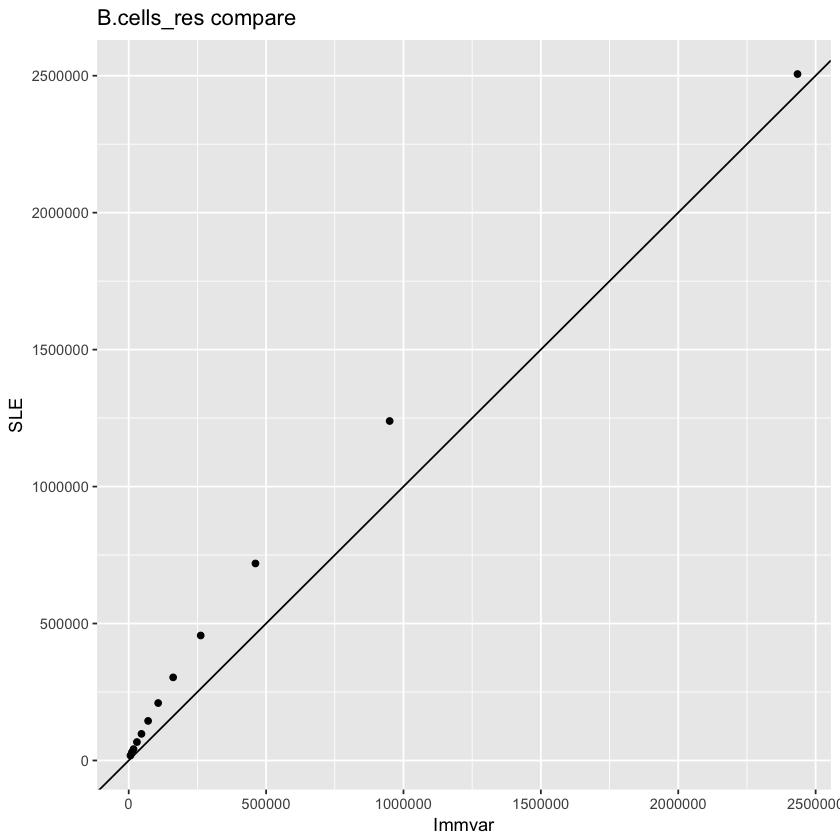

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


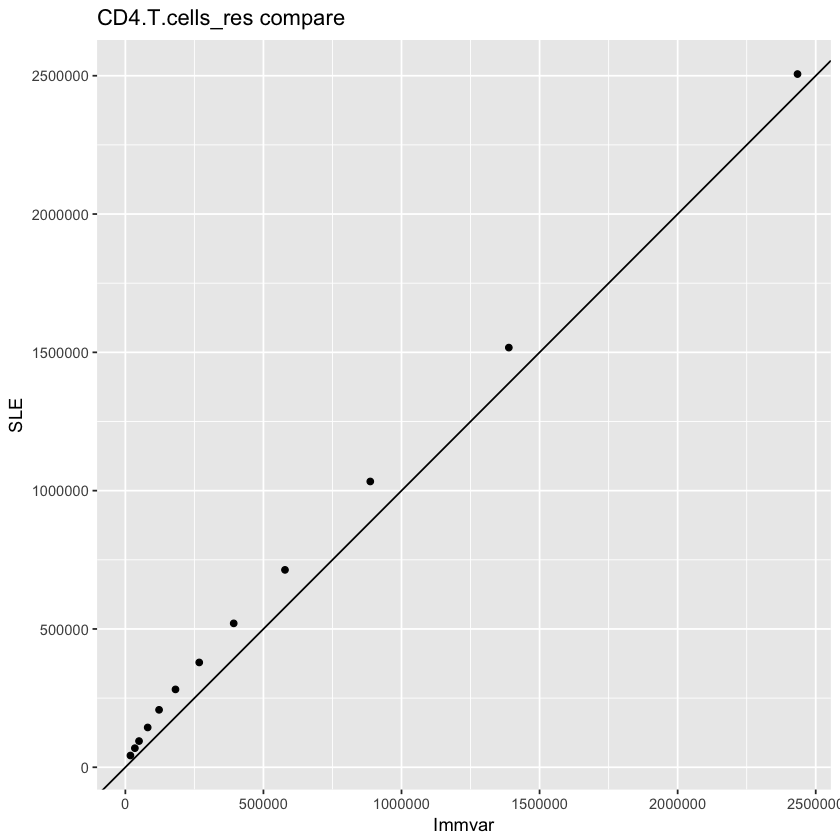

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


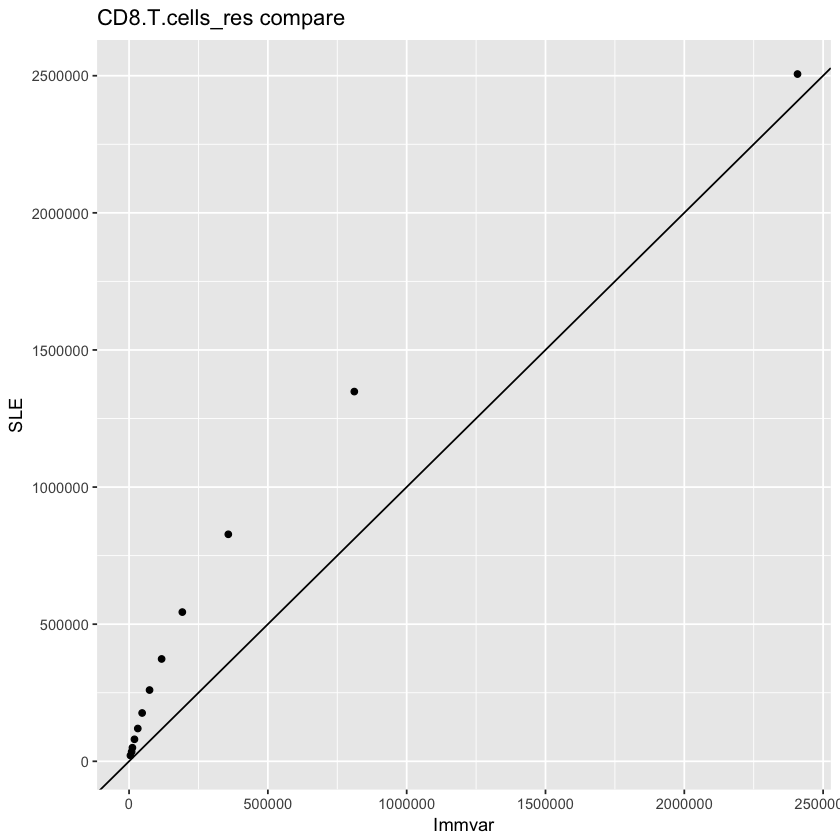

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


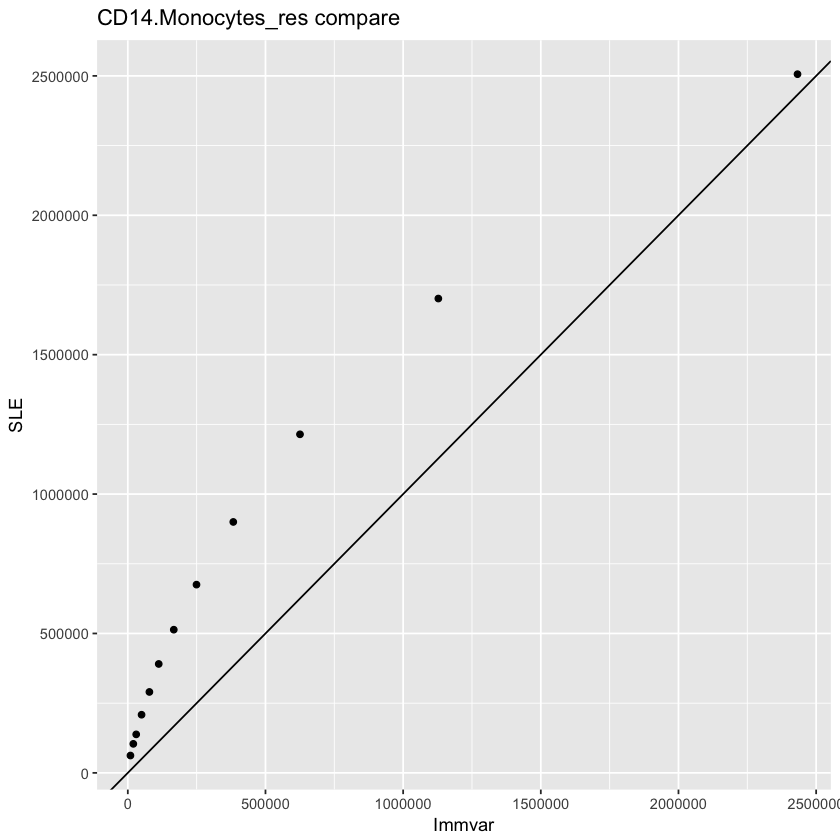

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


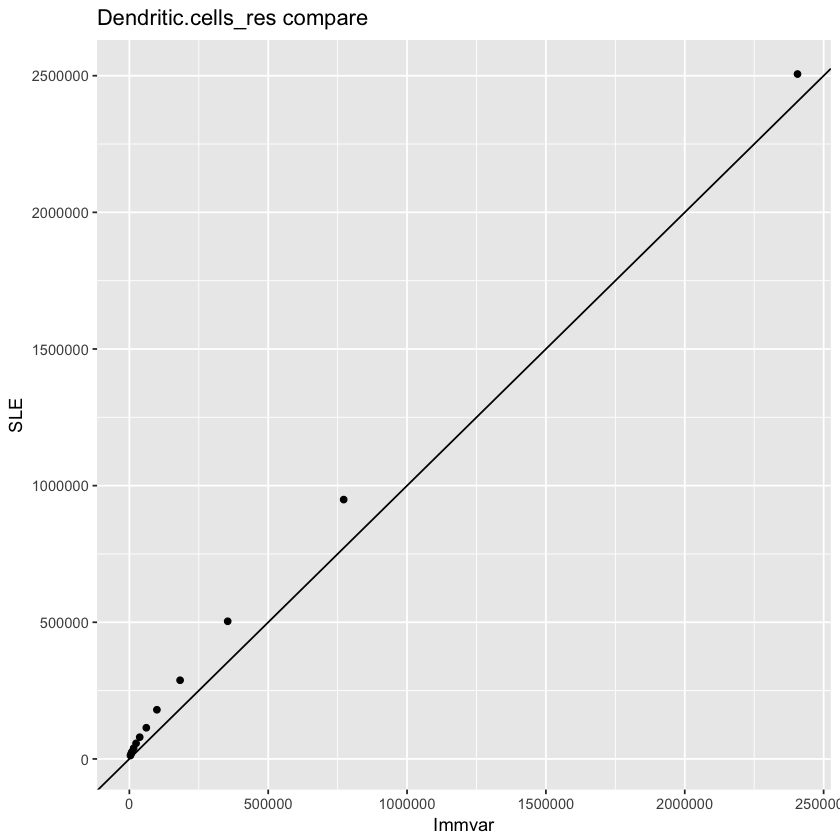

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


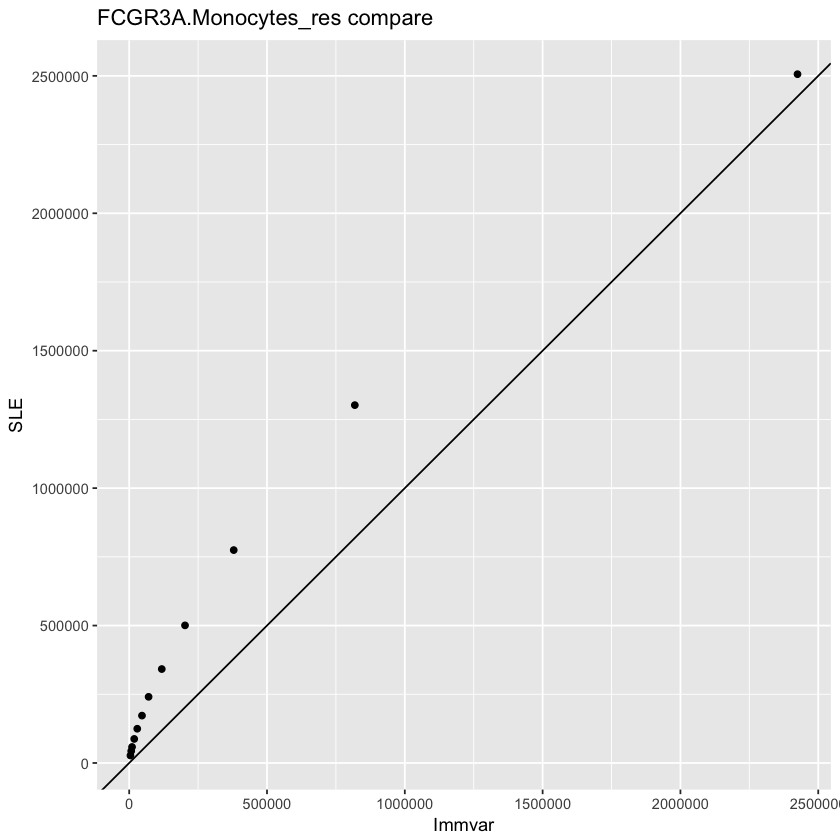

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


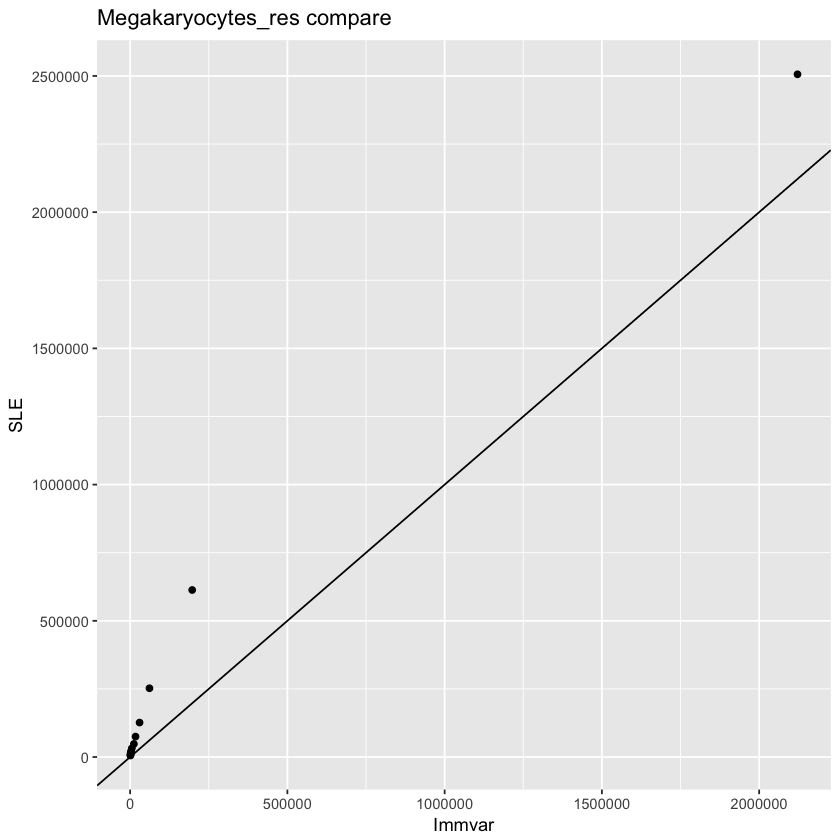

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


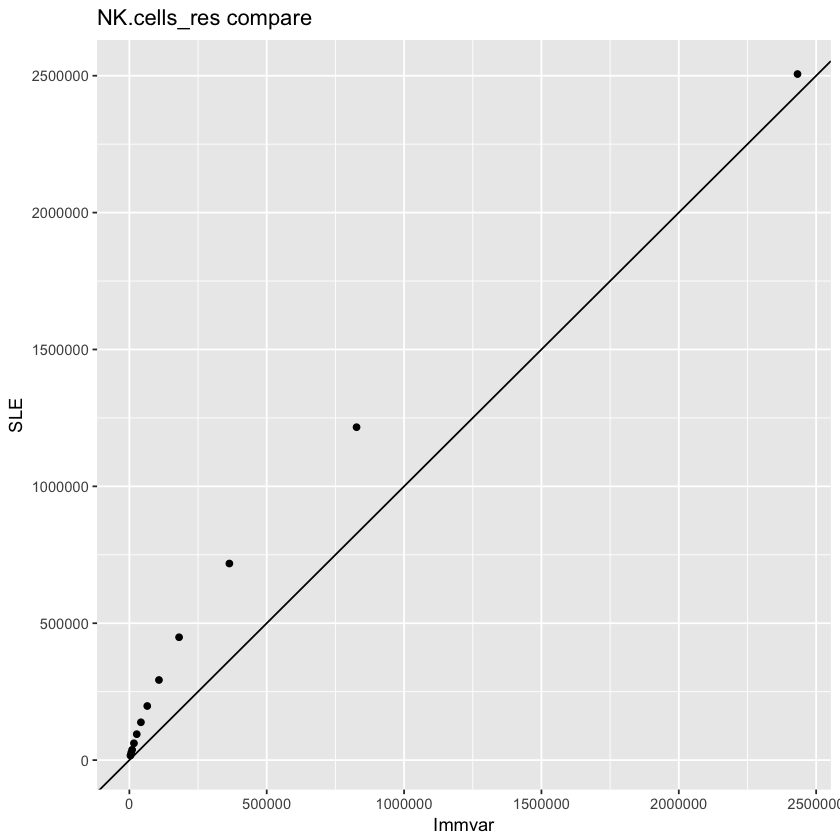

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


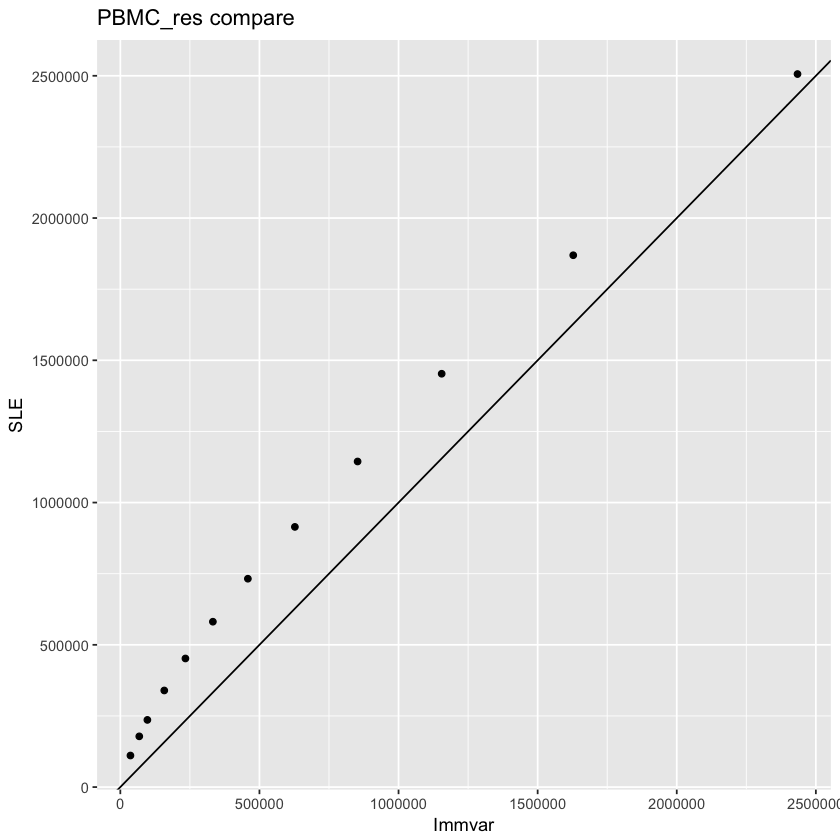

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.
Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


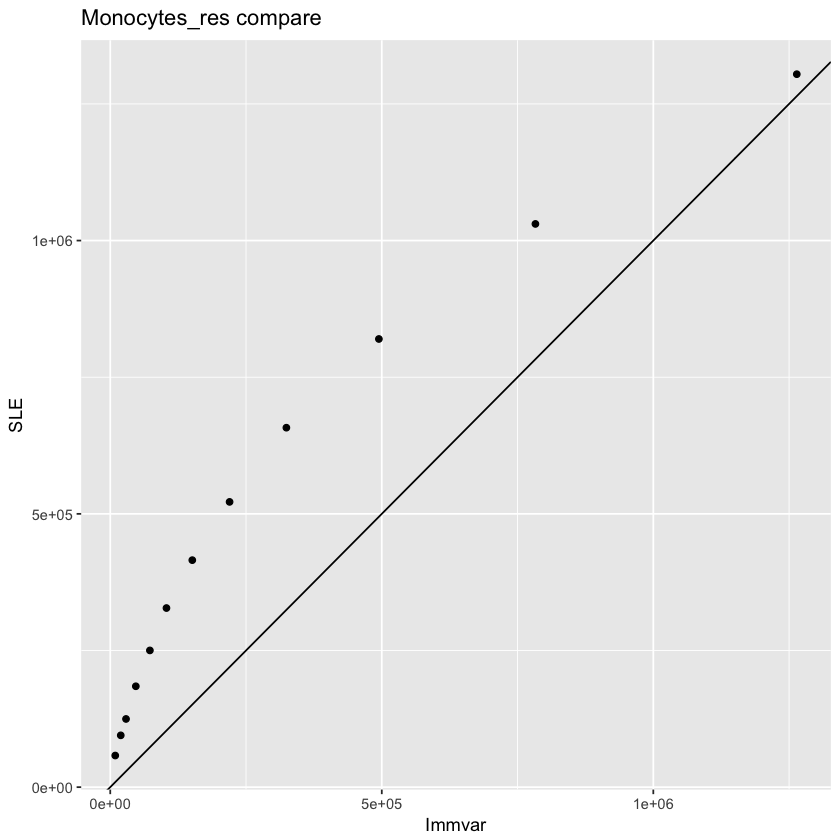

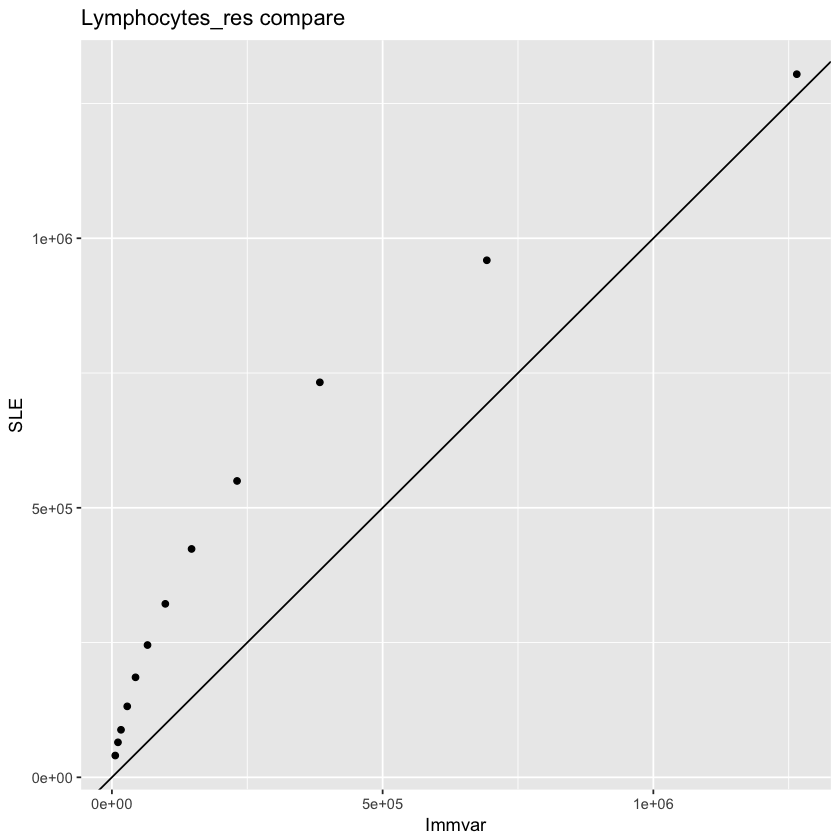

In [207]:

compare_nums(Immvar.all, SLE.all, "B.cells_res", "Immvar", "SLE")
compare_nums(Immvar.all, SLE.all, "CD4.T.cells_res", "Immvar", "SLE")
compare_nums(Immvar.all, SLE.all, "CD8.T.cells_res", "Immvar", "SLE")
compare_nums(Immvar.all, SLE.all, "CD14.Monocytes_res", "Immvar", "SLE")
compare_nums(Immvar.all, SLE.all, "Dendritic.cells_res", "Immvar", "SLE")
compare_nums(Immvar.all, SLE.all, "FCGR3A.Monocytes_res", "Immvar", "SLE")
compare_nums(Immvar.all, SLE.all, "Megakaryocytes_res", "Immvar", "SLE")
compare_nums(Immvar.all, SLE.all, "NK.cells_res", "Immvar", "SLE")
compare_nums(Immvar.all, SLE.all, "PBMC_res", "Immvar", "SLE")
compare_nums(Immvar.all, SLE.all, "Monocytes_res", "Immvar", "SLE")
compare_nums(Immvar.all, SLE.all, "Lymphocytes_res", "Immvar", "SLE")

##SLE has 120 people and Immvar is 50 so these results are what we would expect

In [27]:
#remove large data frames
rm(SLE.eQTL.B.cells)
rm(SLE.eQTL.CD4.T.cells)
rm(SLE.eQTL.CD8.T.cells)
rm(SLE.eQTL.CD14.Monocytes)
rm(SLE.eQTL.Dendritic.cells)
rm(SLE.eQTL.FCGR3A.Monocytes)
rm(SLE.eQTL.Megakaryocytes)
rm(SLE.eQTL.NK.cells)
rm(SLE.eQTL.PBMC)
rm(SLE.eQTL.Monocytes)
rm(SLE.eQTL.Lymphocytes)

Warning message in rm(SLE.eQTL.B.cells):
“object 'SLE.eQTL.B.cells' not found”Warning message in rm(SLE.eQTL.CD4.T.cells):
“object 'SLE.eQTL.CD4.T.cells' not found”Warning message in rm(SLE.eQTL.CD8.T.cells):
“object 'SLE.eQTL.CD8.T.cells' not found”Warning message in rm(SLE.eQTL.CD14.Monocytes):
“object 'SLE.eQTL.CD14.Monocytes' not found”Warning message in rm(SLE.eQTL.Dendritic.cells):
“object 'SLE.eQTL.Dendritic.cells' not found”Warning message in rm(SLE.eQTL.FCGR3A.Monocytes):
“object 'SLE.eQTL.FCGR3A.Monocytes' not found”Warning message in rm(SLE.eQTL.Megakaryocytes):
“object 'SLE.eQTL.Megakaryocytes' not found”Warning message in rm(SLE.eQTL.NK.cells):
“object 'SLE.eQTL.NK.cells' not found”Warning message in rm(SLE.eQTL.PBMC):
“object 'SLE.eQTL.PBMC' not found”Warning message in rm(SLE.eQTL.Monocytes):
“object 'SLE.eQTL.Monocytes' not found”Warning message in rm(SLE.eQTL.Lymphocytes):
“object 'SLE.eQTL.Lymphocytes' not found”

In [ ]:
## Run 

## make heat map for all cell types

In [203]:
##Plotting function for all cell heatmap
heatmap_all_cells<- function(plotdata,title){
    #create dataframe for plotting
    enrich.data=plotdata[c(1,2,4,6,8,10,12,14,16,18)]
    sig.data=plotdata[c(1,3,5,7,9,11,13,15,17,19)]
    lab=c("disease","Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC")
    colnames(enrich.data)=lab
    colnames(sig.data)=lab
    sig=melt(data = sig.data, id.vars = "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"),value.name = "pvalue",variable.name="cell")
    enrich=melt(data = enrich.data, id.vars= "disease", measure.vars = c("Bcell","CD14+.Monocytes","CD4.T.cells","CD8.T.cells","Dendritic.cells","FCGR3A+.Monocytes","Megakaryocytes","NK.cells","PBMC"), value.name = "enrichment",variable.name="cell")
    
    #merge dfs
    df=merge(enrich,sig)
    
    #cluster data
    den=as.dendrogram(hclust( dist(plotdata, method = "euclidean"), method = "ward.D" ))
    ordr=order.dendrogram(den)
    dendro.plot <- ggdendrogram(data = den, labels=FALSE, leaf_labels=FALSE,rotate = TRUE,axes=F)
    
    #label significance 
    df$star <- cut(df$pvalue, breaks=c(-Inf, 0.001, 0.01, 0.05, Inf), label=c("***", "**", "*", ""))
    #df$star <- cut(df$pvalue, breaks=c(-Inf, 0.0000000002, 0.00000002, 0.000002, Inf), label=c("***", "**", "*", ""))
    
    df_clust=df[ordr,]
    df$disease <-factor(x=df$disease, levels=enrich.data$disease[ordr],ordered=TRUE)
    
    #plot
    grid.newpage()
    heatmap.plot=ggplot(data = df, aes(x = cell, y = disease)) +ggtitle(title)+
    geom_tile(aes(fill = enrichment)) +scale_fill_gradient(low = "blue", high = "red")+labs(fill = "Enrichment")+geom_text(aes(label=star), color="black", size=3)+theme(axis.text.x=element_text(angle=90,hjust=1))
    
    print(heatmap.plot, vp = viewport(x = 0.4, y = 0.5, width = 0.8, height = 1.0),labels=FALSE)
    plot(dendro.plot, axes=FALSE,vp = viewport(x = 0.9, y = 0.56, width = 0.2, height = 0.88))
}

In [209]:
##read data

##All meta data
M2_01=read.table("/Users/student/M2.enrich.all.FDR.0.1.txt")
M2_02=read.table("/Users/student/M2.enrich.all.FDR.0.2.txt")

Warning message in dist(plotdata, method = "euclidean"):
“NAs introduced by coercion”Warning message in dist(plotdata, method = "euclidean"):
“NAs introduced by coercion”

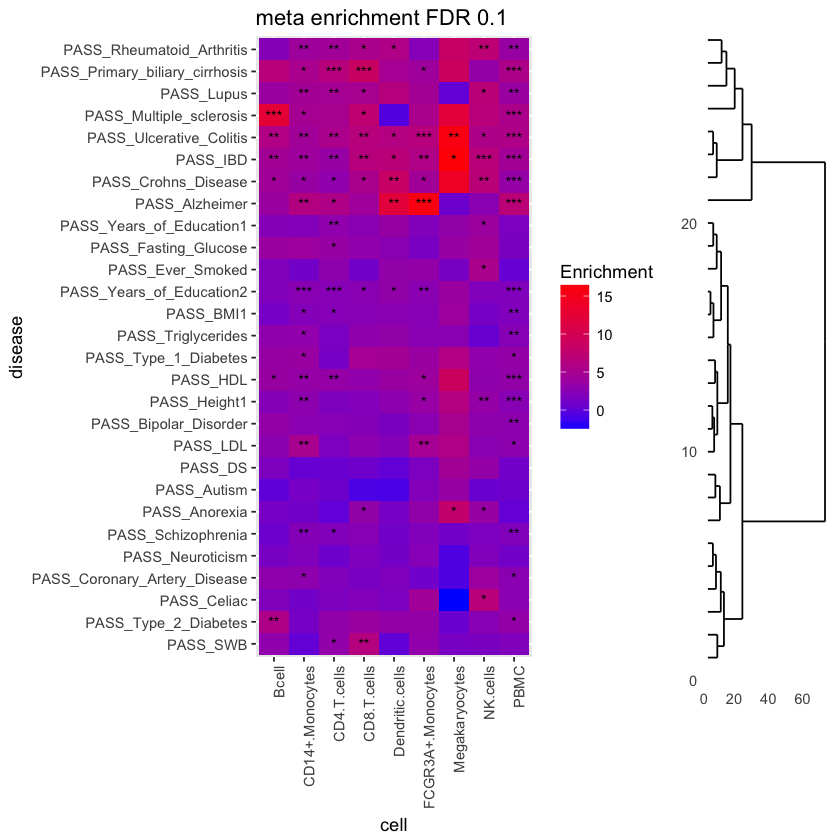

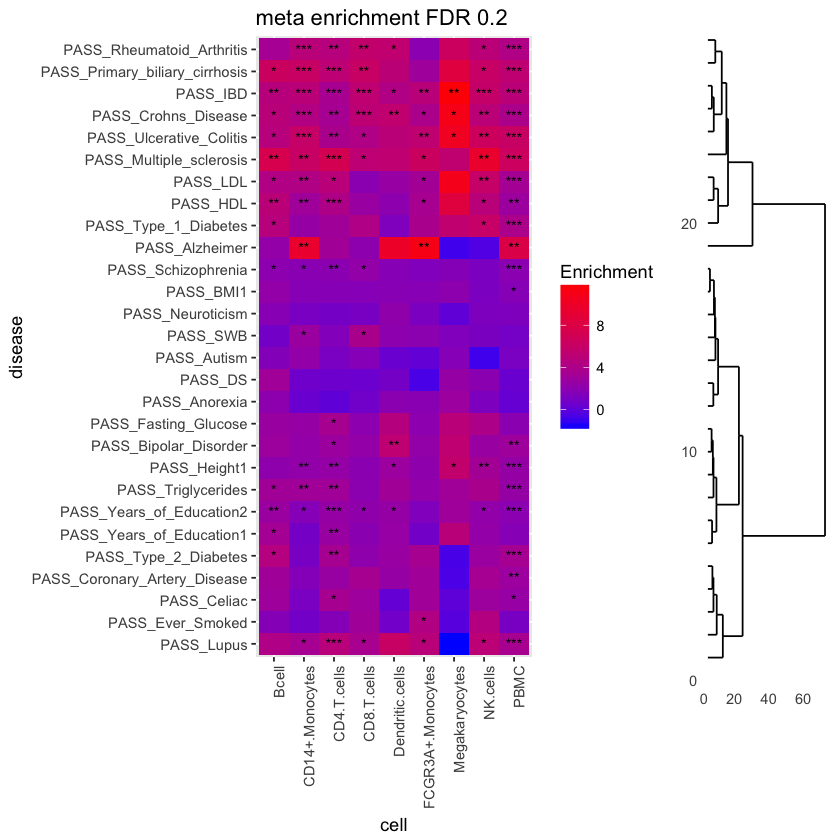

In [210]:
##plot data
heatmap_all_cells(M2_01,"meta enrichment FDR 0.1")
heatmap_all_cells(M2_02,"meta enrichment FDR 0.2")

## make pseudo bulk heat map

In [220]:
heatmap_pseudo_bulk<- function(plotdata,title){
    #create dataframe for plotting
    enrich.data=plotdata[c(1,2,4)]
    sig.data=plotdata[c(1,3,5)]
    lab=c("disease","Monocytes","Lymphocytes")
    colnames(enrich.data)=lab
    colnames(sig.data)=lab
    sig=melt(data = sig.data, id.vars = "disease", measure.vars = c("Monocytes","Lymphocytes"),value.name = "pvalue",variable.name="cell")
    enrich=melt(data = enrich.data, id.vars= "disease", measure.vars = c("Monocytes", "Lymphocytes"), value.name = "enrichment",variable.name="cell")

    #merge dfs
    df=merge(enrich,sig)
    #print(df)
    #cluster data
    den=as.dendrogram(hclust( dist(plotdata, method = "manhattan"), method = "ward.D" ))
    ordr=order.dendrogram(den)
    dendro.plot <- ggdendrogram(data = den, labels=FALSE, leaf_labels=FALSE,rotate = TRUE,axes=F)
    
    #label significance 
    df$star <- cut(df$pvalue, breaks=c(-Inf, 0.001, 0.01, 0.05, Inf), label=c("***", "**", "*", ""))
    #df$star <- cut(df$pvalue, breaks=c(-Inf, 0.0000000002, 0.00000002, 0.000002, Inf), label=c("***", "**", "*", ""))
    
    df_clust=df[ordr,]
    df$disease <-factor(x=df$disease, levels=enrich.data$disease[ordr],ordered=TRUE)
    
    #plot
    grid.newpage()
    heatmap.plot=ggplot(data = df, aes(x = cell, y = disease)) +ggtitle(title)+
    geom_tile(aes(fill = enrichment)) +scale_fill_gradient(low = "blue", high = "red")+labs(fill = "Enrichment")+geom_text(aes(label=star), color="black", size=3)+theme(axis.text.x=element_text(angle=90,hjust=1))
    
    print(heatmap.plot, vp = viewport(x = 0.4, y = 0.5, width = 0.8, height = 1.0),labels=FALSE)
    plot(dendro.plot, axes=FALSE,vp = viewport(x = 0.9, y = 0.52, width = 0.2, height = 0.92))
}

In [188]:
#read bulk data
bulkH=read.table("/Users/student/CH.bulk.enrich.all.FDR.0.1.txt")
bulkSLE=read.table("/Users/student/CSLE.bulk.enrich.all.FDR.0.1.txt")

Warning message in dist(plotdata, method = "manhattan"):
“NAs introduced by coercion”Warning message in dist(plotdata, method = "manhattan"):
“NAs introduced by coercion”

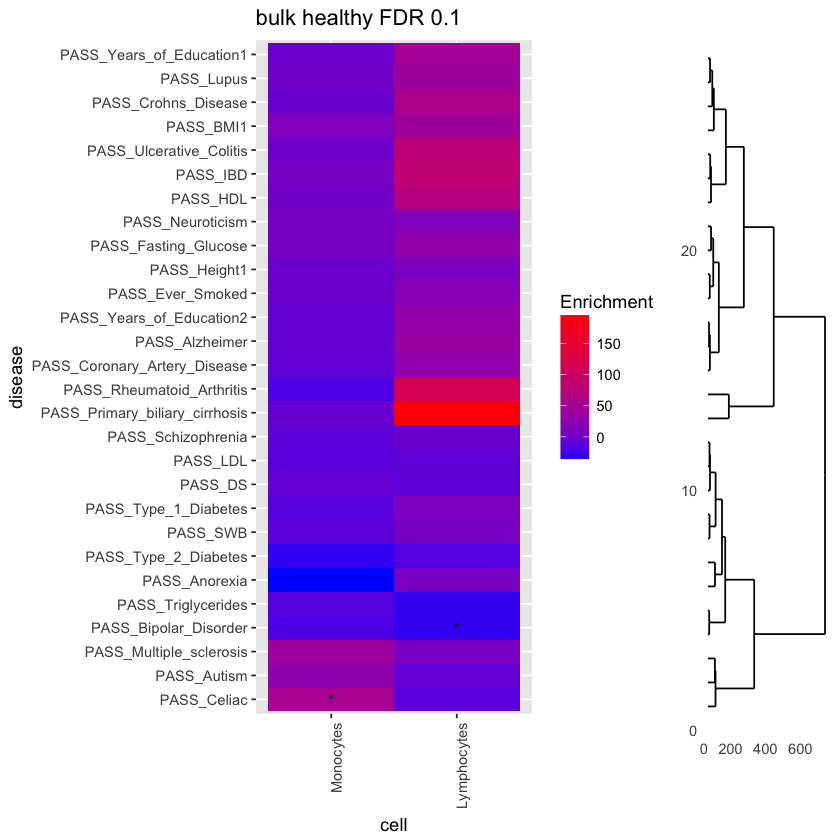

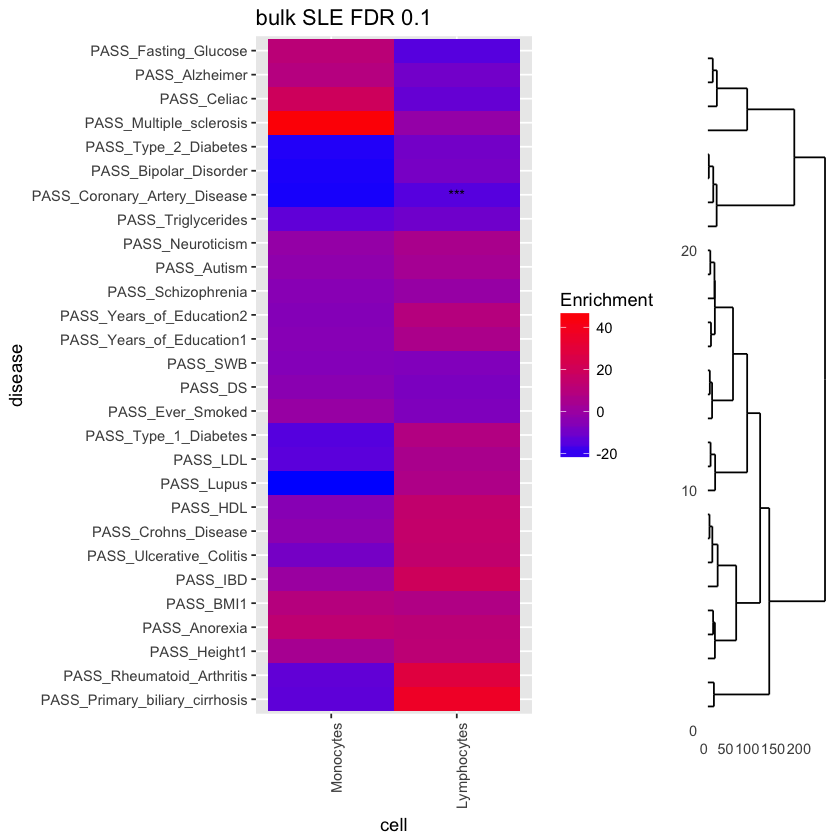

In [221]:
#plot heatmap
heatmap_pseudo_bulk(bulkH,"bulk healthy FDR 0.1")
heatmap_pseudo_bulk(bulkSLE,"bulk SLE FDR 0.1")

## make enrichment Healthy vs SLE scatterplots 

In [115]:
##Plotting function for scatter plots
scatter<- function(SLE,H,fdr){
    #subset data to create plotting dataframe
    SLE_enrich.data=SLE[c(1,2,4)]
    SLE_sig.data=SLE[c(1,3,5)]

    H_enrich.data=H[c(1,2,4)]
    H_sig.data=H[c(1,3,5)]

    lab=c("disease","Monocytes","Lymphocytes")
    colnames(SLE_enrich.data)=lab
    colnames(SLE_sig.data)=lab
    colnames(H_enrich.data)=lab
    colnames(H_sig.data)=lab

    H_sig=melt(data = H_sig.data, id.vars = "disease", measure.vars = c("Monocytes","Lymphocytes"), variable.name="cell",value.name = "pvalue")
    H_enrich=melt(data = H_enrich.data, id.vars= "disease", measure.vars = c("Monocytes", "Lymphocytes"), variable.name="cell",value.name = "enrichment")

    SLE_sig=melt(data = SLE_sig.data, id.vars = "disease", measure.vars = c("Monocytes","Lymphocytes"),variable.name="cell",value.name = "pvalue")
    SLE_enrich=melt(data = SLE_enrich.data, id.vars= "disease", measure.vars = c("Monocytes", "Lymphocytes"), variable.name="cell",value.name = "enrichment")

    #Make cell specific dataframe
    Hlab=c("disease","cell","healthy")
    SLElab=c("disease","cell","SLE")
    colnames(H_enrich)=Hlab
    colnames(SLE_enrich)=SLElab
    e=merge(H_enrich,SLE_enrich)

    lymph=filter(e,cell=="Lymphocytes")
    mono=filter(e,cell=="Monocytes")
    
    
    group.colors=c(PASS_Celiac='red',PASS_Crohns_Disease='blue',PASS_Lupus='orange',PASS_Multiple_sclerosis='yellow',PASS_Primary_biliary_cirrhosis='cyan',PASS_Rheumatoid_Arthritis='green',PASS_Type_1_Diabetes='purple',PASS_Ulcerative_Colitis='pink',PASS_IBD='magenta', PASS_Alzheimer='maroon',PASS_DS='darkgreen',PASS_Bipolar_Disorder='grey',PASS_Coronary_Artery_Disease='grey',PASS_Ever_Smoked='grey',PASS_HDL='grey',PASS_Height1='grey',PASS_SWB='grey',PASS_Type_2_Diabetes='grey',PASS_Anorexia='grey',PASS_Autism='grey',PASS_BMI1='grey',PASS_Fasting_Glucose='grey',PASS_LDL='grey',PASS_Neuroticism='grey',PASS_Schizophrenia='grey',PASS_Triglycerides='grey',PASS_Years_of_Education1='grey',PASS_Years_of_Education2='grey')
    grid.newpage()
    lymph.plot=ggplot(lymph,aes(x=healthy,y=SLE, color=disease))+geom_point(show.legend = FALSE)+geom_abline(slope=1,intercept=0)+ggtitle(paste("Lymphocyte FDR",fdr))+ scale_colour_manual(values=group.colors)
    mono.plot=ggplot(mono,aes(x=healthy,y=SLE, color=disease))+geom_point()+geom_abline(slope=1,intercept=0)+ggtitle(paste("Monocyte FDR",fdr))+ scale_colour_manual(values=group.colors)+theme(legend.text = element_text(size=4),legend.position="right")
    print(lymph.plot,vp = viewport(x = 0.2, y = 0.5, width = 0.4, height = 1.0),labels=FALSE)
    plot(mono.plot,vp = viewport(x = 0.7, y = 0.5, width = 0.7, height = 1.0))
}


In [207]:
#read data
SLE_01=read.table("/Users/student/CSLE.bulk.enrich.all.FDR.0.1.txt")
H_01=read.table("/Users/student/CH.bulk.enrich.all.FDR.0.1.txt")
SLE_02=read.table("/Users/student/CSLE.bulk.enrich.all.FDR.0.2.txt")
H_02=read.table("/Users/student/CH.bulk.enrich.all.FDR.0.2.txt")
SLE_05=read.table("/Users/student/CSLE.bulk.enrich.all.FDR.0.5.txt")
H_05=read.table("/Users/student/CH.bulk.enrich.all.FDR.0.5.txt")


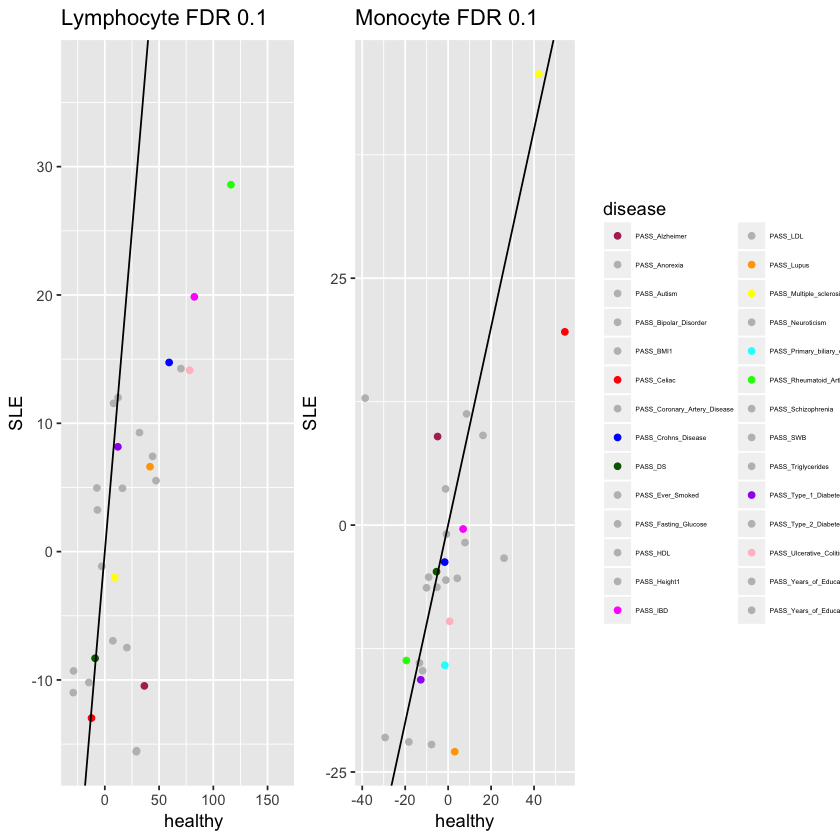

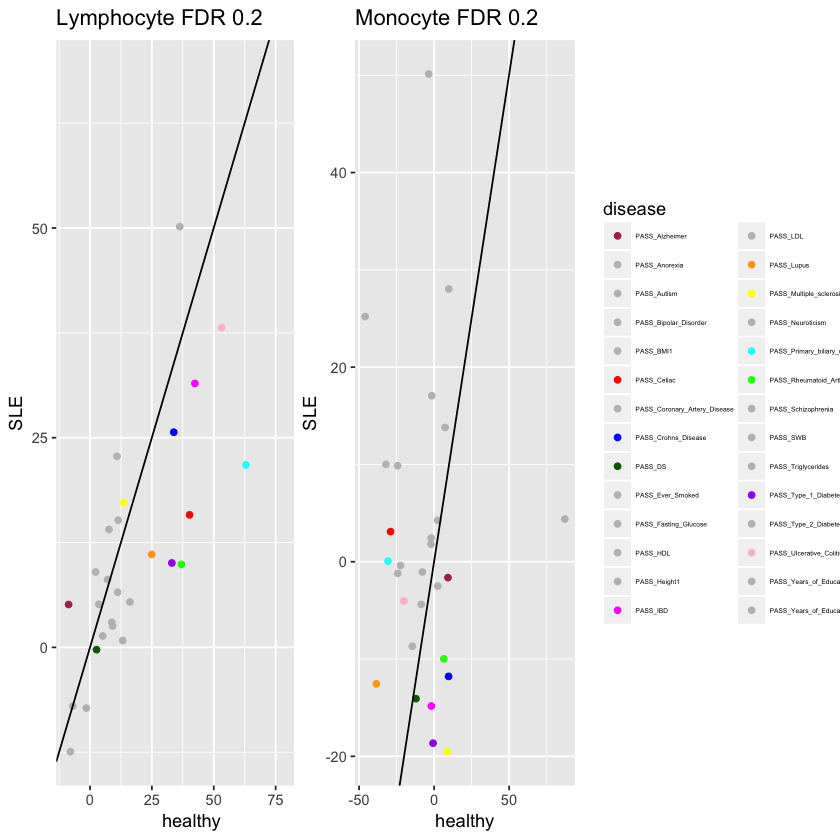

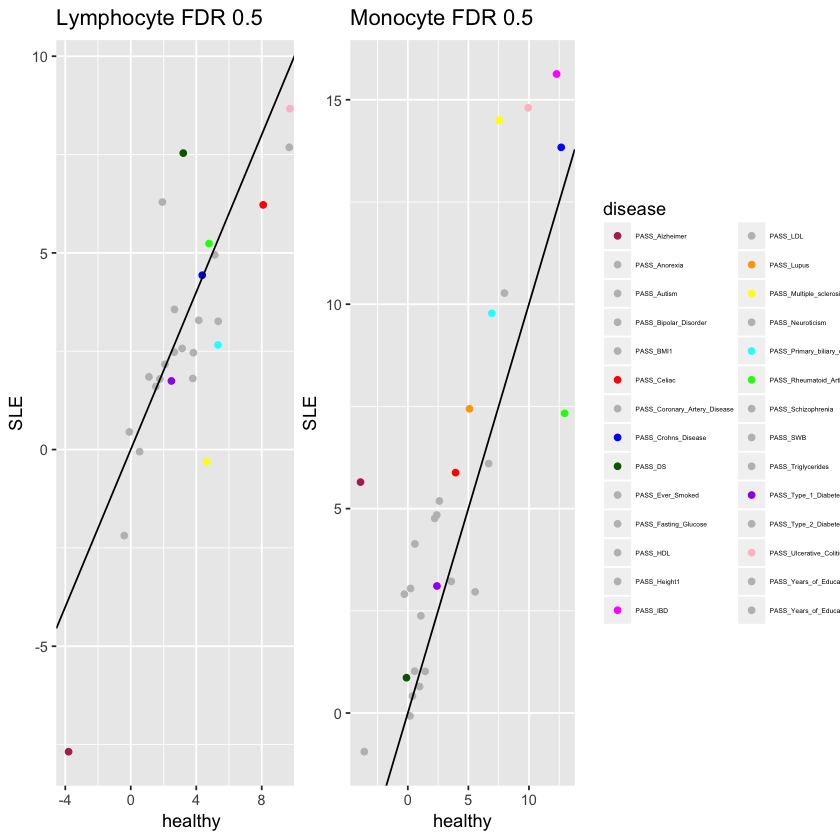

In [208]:
#plot data

scatter(SLE_01,H_01,0.1)
scatter(SLE_02,H_02,0.2)
scatter(SLE_05,H_05,0.5)

In [ ]:
## run bulk immvar and bulk SLE, no filtered SNPs

## interaction modeling

In [87]:
#load interaction data 
#This data was generated with the script (get.pseudobulk.ct.interaction.R) 
#each gene was concatinated for each cell type and and FDR was calculated, these are all interactions FDR <0.1
B.cells_interact=clean_df(read.table("/Users/student/Documents/YeLab/Lupus/B.cells.interactions.all.results.fdr.0.1.txt"))
CD14.cells_interact=clean_df(read.table("/Users/student/Documents/YeLab/Lupus/CD14+.Monocytes.interactions.all.results.fdr.0.1.txt"))
CD4.T.cells_interact=clean_df(read.table("/Users/student/Documents/YeLab/Lupus/CD4.T.cells.interactions.all.results.fdr.0.1.txt"))
CD8.T.cells_interact=clean_df(read.table("/Users/student/Documents/YeLab/Lupus/CD8.T.cells.interactions.all.results.fdr.0.1.txt"))
Dendritic.cells_interact=clean_df(read.table("/Users/student/Documents/YeLab/Lupus/Dendritic.cells.interactions.all.results.fdr.0.1.txt"))
FCGR3A.cells_interact=clean_df(read.table("/Users/student/Documents/YeLab/Lupus/FCGR3A+.Monocytes.interactions.all.results.fdr.0.1.txt"))
Megakaryocytes_interact=clean_df(read.table("/Users/student/Documents/YeLab/Lupus/Megakaryocytes.interactions.all.results.fdr.0.1.txt"))
NK.cells_interact=clean_df(read.table("/Users/student/Documents/YeLab/Lupus/NK.cells.interactions.all.results.fdr.0.1.txt"))
PBMC_interact=clean_df(read.table("/Users/student/Documents/YeLab/Lupus/PBMC.interactions.all.results.fdr.0.1.txt"))


In [94]:
clean_df<-function(df){
    lab=c("snp","gene","beta","SE","df","t.value","p.value","FDR")
    colnames(df)=lab
    df$p.value10=-log10(df$p.value)
    return(df)
}
plot_volcano<-function(df,name){
    #df_uniq=(aggregate(cbind(beta,p.value10) ~ gene, df, max))
    df_uniq <- df[order(df$gene, -abs(df$p.value10) ), ] #sort by id and reverse of abs(value)
    df_f=df_uniq[ !duplicated(df_uniq$gene), ]              # take the first row within each id
    head(df_f)
    print(ggplot(df_f, aes(x=beta, y=p.value10))+geom_point()+ggtitle(name)+geom_text(aes(label=ifelse(p.value10>7.7,as.character(gene),'')),hjust=0.5,vjust=-1.1,size=2))
    return(df_f)
}

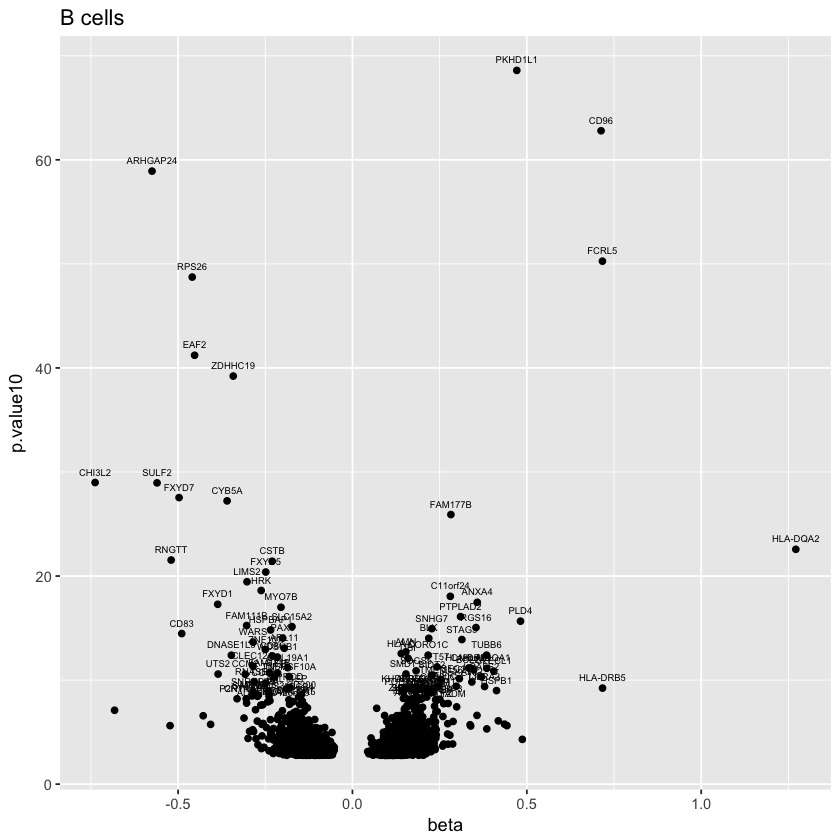

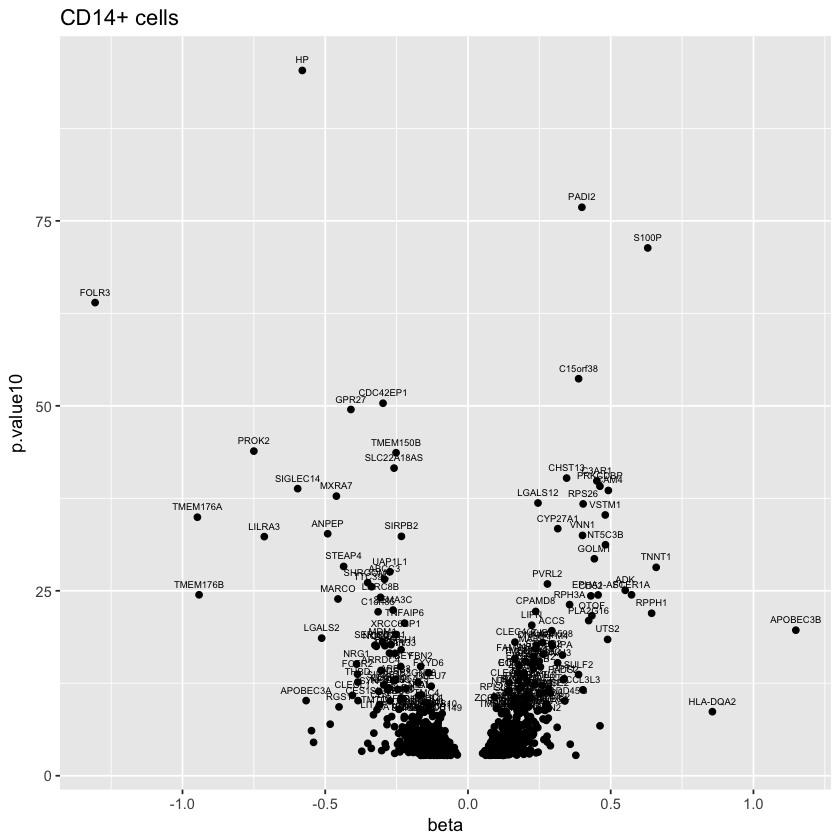

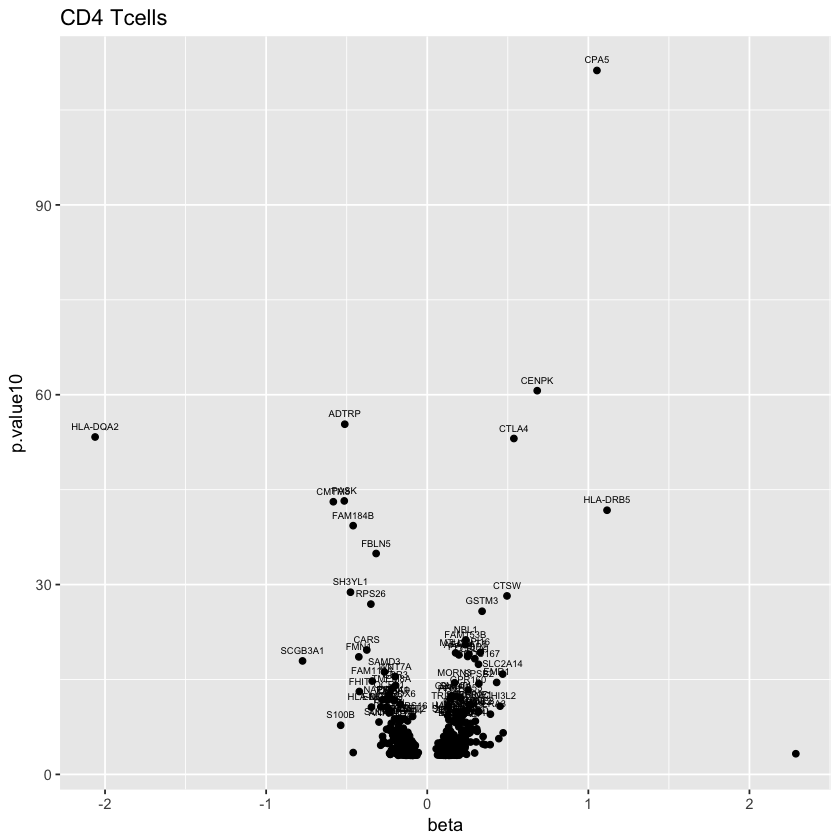

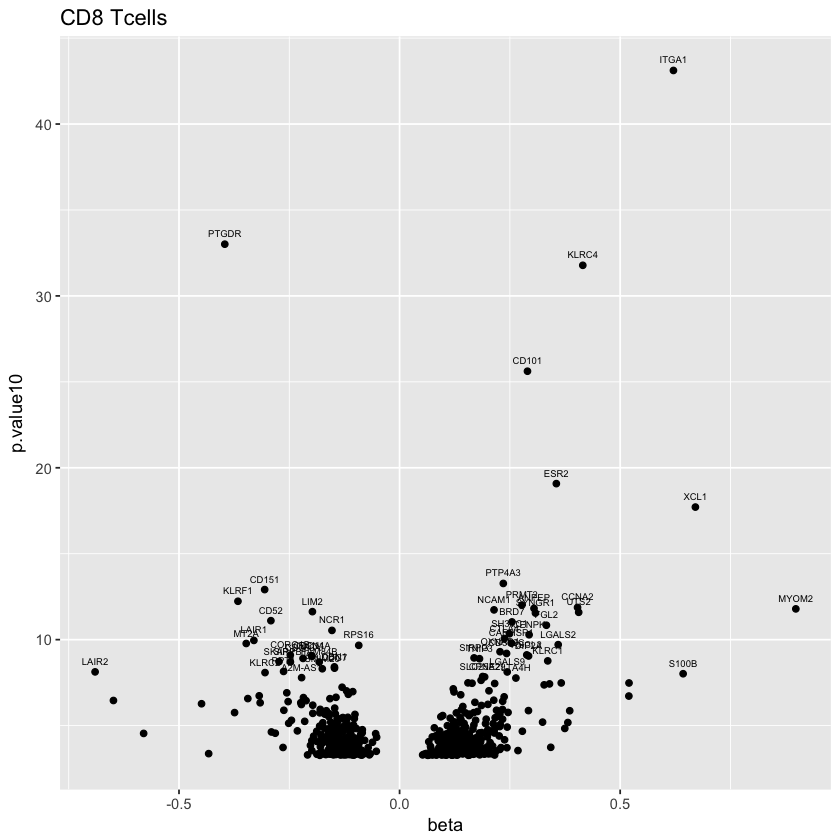

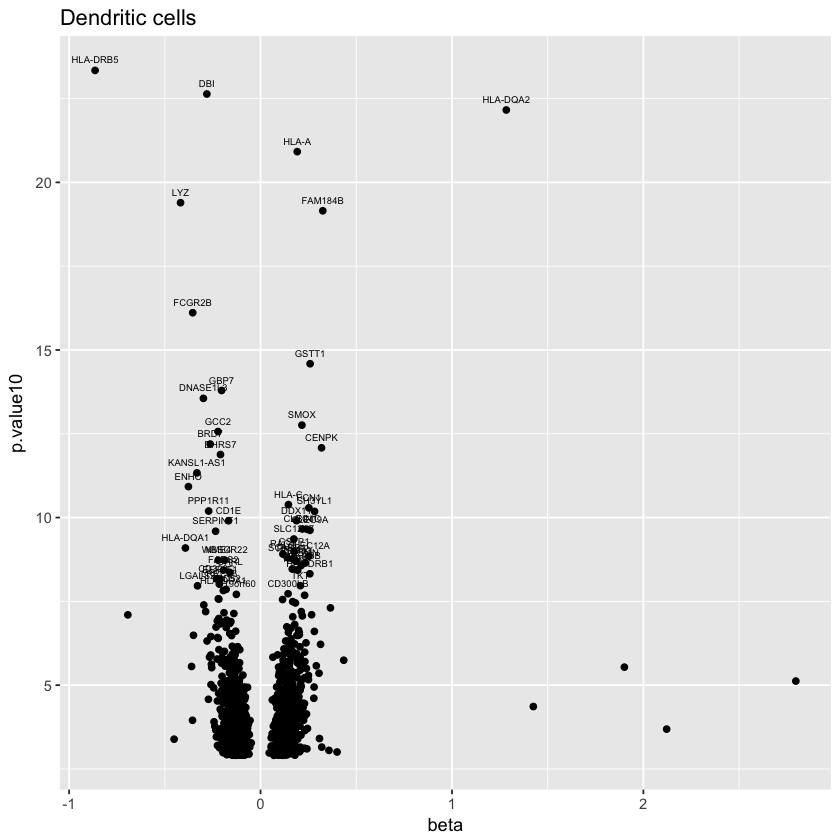

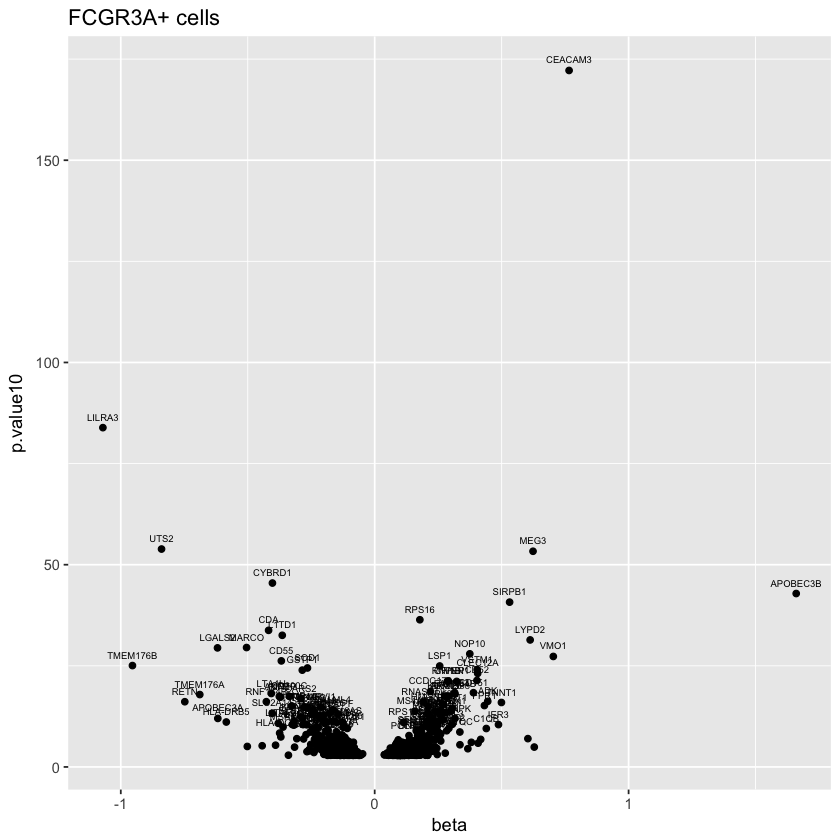

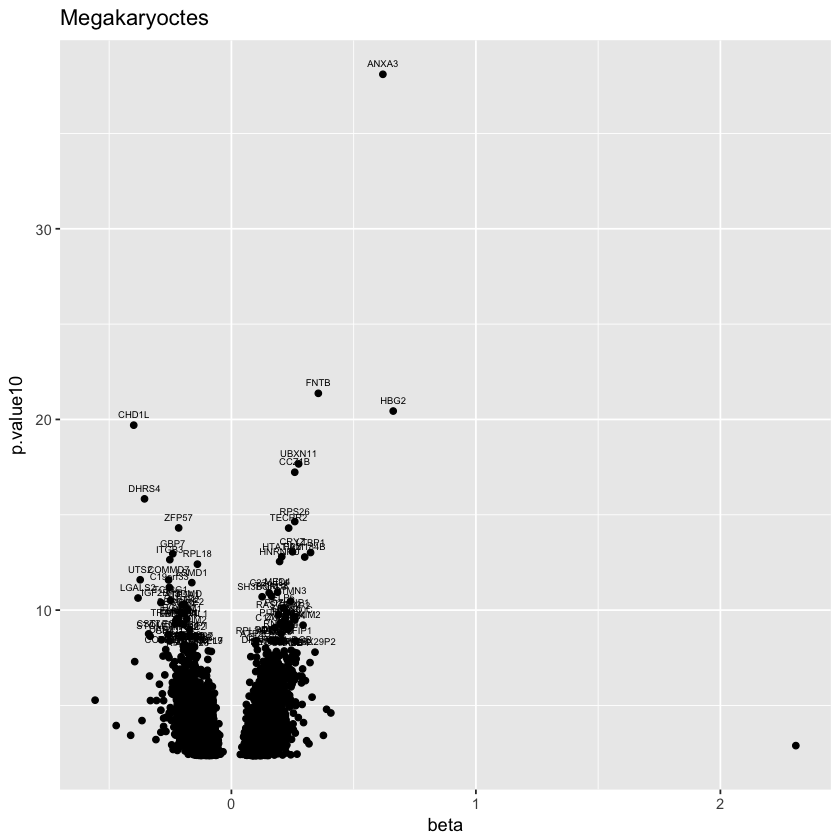

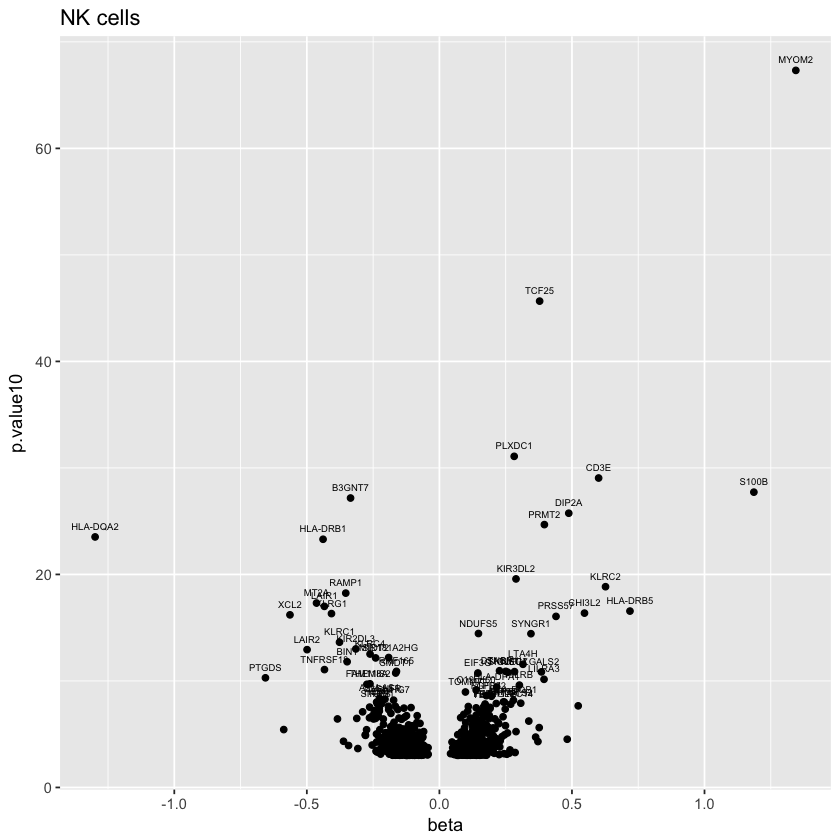

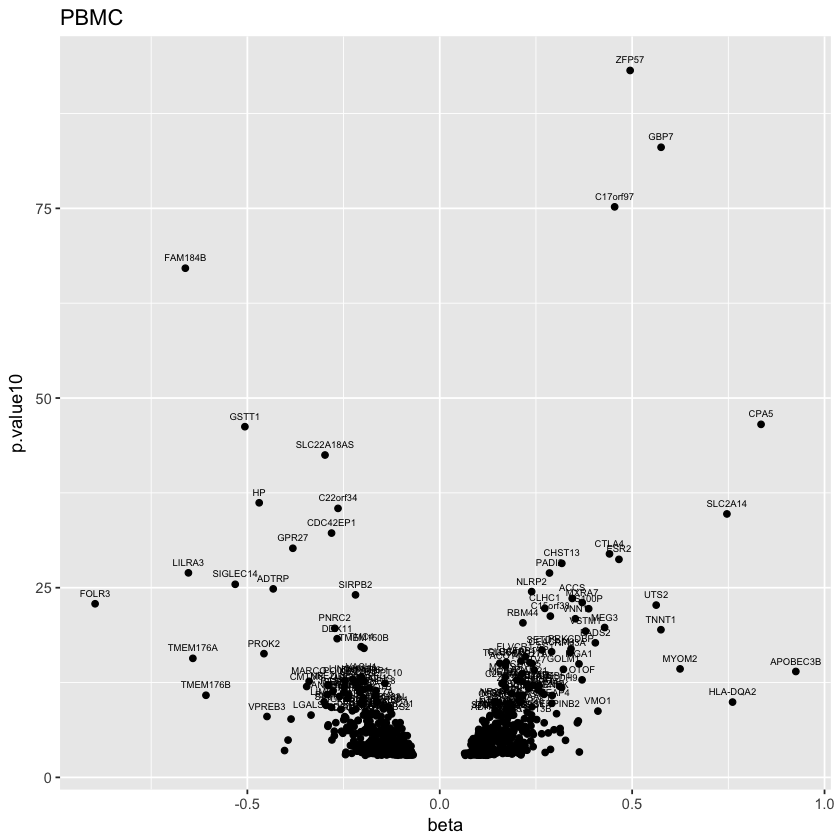

In [95]:
#plot results
B.cells_uniq=plot_volcano(B.cells_interact, "B cells")
CD14.cells_uniq=plot_volcano(CD14.cells_interact,"CD14+ cells")
CD4.T.cells_uniq=plot_volcano(CD4.T.cells_interact,"CD4 Tcells")
CD8.T.cells_uniq=plot_volcano(CD8.T.cells_interact,"CD8 Tcells")
Dendritic.cells_uniq=plot_volcano(Dendritic.cells_interact, "Dendritic cells")
FCGR3A.cells_uniq=plot_volcano(FCGR3A.cells_interact,"FCGR3A+ cells")
Megakaryocytes_uniq=plot_volcano(Megakaryocytes_interact,"Megakaryoctes")
NK.cells_uniq=plot_volcano(NK.cells_interact, "NK cells")
PBMC_uniq=plot_volcano(PBMC_interact, "PBMC")


In [110]:
get_best<-function(df){
    df1=filter(df,p.value10>7.7)
    return(df1[order(-df1$beta),])
} 

In [116]:
get_best(B.cells_uniq)
get_best(CD14.cells_uniq)
get_best(CD4.T.cells_uniq)
get_best(CD8.T.cells_uniq)
get_best(Dendritic.cells_uniq)
get_best(FCGR3A.cells_uniq)
get_best(Megakaryocytes_uniq)
get_best(NK.cells_uniq)
get_best(PBMC_uniq)

dim(get_best(B.cells_uniq))
dim(get_best(CD14.cells_uniq))
dim(get_best(CD4.T.cells_uniq))
dim(get_best(CD8.T.cells_uniq))
dim(get_best(Dendritic.cells_uniq))
dim(get_best(FCGR3A.cells_uniq))
dim(get_best(Megakaryocytes_uniq))
dim(get_best(NK.cells_uniq))
dim(get_best(PBMC_uniq))

,snp,gene,beta,SE,df,t.value,p.value,FDR,p.value10
55,6:32609746,HLA-DQA2,1.2713195,0.12331382,699.5543,10.309627,2.684500e-23,1.381425e-19,22.571137
57,6:32559019,HLA-DRB5,0.7170375,0.11414931,697.4510,6.281575,5.897603e-10,4.876211e-07,9.229324
46,1:157514091,FCRL5,0.7167543,0.04388631,694.8638,16.332070,5.455196e-51,1.752704e-46,50.263190
26,3:111249866,CD96,0.7128688,0.03812913,696.5051,18.696174,1.605549e-63,3.353013e-58,62.794376
80,14:105401180,PLD4,0.4818446,0.05723462,694.3830,8.418761,2.173142e-16,5.585683e-13,15.662912
78,8:110466085,PKHD1L1,0.4712040,0.02384834,696.1364,19.758357,2.533152e-69,6.348251e-63,68.596339
60,7:75840258,HSPB1,0.4131312,0.06673781,698.4391,6.190362,1.023449e-09,7.841130e-07,8.989934
30,12:9881125,CLECL1,0.4051895,0.05894274,690.9327,6.874290,1.394463e-11,1.767638e-08,10.855593
54,6:32612627,HLA-DQA1,0.3851534,0.05525276,696.9754,6.970754,7.323423e-12,1.012300e-08,11.135286
111,18:12386771,TUBB6,0.3844465,0.05197436,695.2258,7.396850,4.027921e-13,6.747490e-10,12.394919


,snp,gene,beta,SE,df,t.value,p.value,FDR,p.value10
10,22:39358037,APOBEC3B,1.1484564,0.12010984,675.5494,9.561718,2.111079e-20,3.648626e-17,19.675496
75,6:32609545,HLA-DQA2,0.8561706,0.14122381,698.4372,6.062509,2.193140e-09,9.215558e-07,8.658934
173,19:55671374,TNNT1,0.6592374,0.05646852,698.7305,11.674423,6.811591e-29,2.544010e-25,28.166751
134,14:20814865,RPPH1,0.6433787,0.06335510,696.6840,10.155122,1.090007e-22,2.282064e-19,21.962571
138,4:6697673,S100P,0.6297019,0.03111509,700.8669,20.237833,4.544313e-72,1.498468e-67,71.342532
58,1:159272060,FCER1A,0.5729981,0.05313225,696.1135,10.784374,3.505850e-25,8.956064e-22,24.455207
4,10:75928933,ADK,0.5508382,0.05038867,697.9756,10.931787,8.719702e-26,2.359845e-22,25.059498
80,19:10397131,ICAM4,0.4917674,0.03519556,696.1363,13.972426,2.747613e-39,2.172147e-35,38.561044
180,1:7970383,UTS2,0.4892543,0.05312515,697.2970,9.209467,3.776753e-19,5.856930e-16,18.422881
108,17:39976877,NT5C3B,0.4815705,0.03891081,697.7903,12.376267,6.023402e-32,2.925398e-28,31.220158


,snp,gene,beta,SE,df,t.value,p.value,FDR,p.value10
40,6:32549313,HLA-DRB5,1.1160283,0.07627268,696.8491,14.632085,1.786228e-42,2.183614e-38,41.748063
20,7:130003458,CPA5,1.0533560,0.03864938,698.4910,27.254153,5.685840e-112,2.374850e-106,111.245205
15,5:64845719,CENPK,0.6826573,0.03729774,694.5218,18.302912,2.289917e-61,2.049532e-56,60.640180
22,2:204738919,CTLA4,0.5377683,0.03187736,697.7949,16.869915,8.255582e-54,2.405703e-49,53.083252
23,11:65644027,CTSW,0.4950462,0.04234921,691.0641,11.689621,6.222461e-29,2.471301e-25,28.206038
77,12:8034270,SLC2A14,0.4683082,0.05526360,696.4952,8.474080,1.407219e-16,2.520790e-13,15.851638
16,1:111783271,CHI3L2,0.4520921,0.06600718,692.2796,6.849136,1.641985e-11,1.583273e-08,10.784631
25,19:6924490,EMR1,0.4309016,0.05334098,692.3052,8.078247,2.921990e-15,4.522981e-12,14.534321
44,19:54800500,LILRA3,0.3920718,0.06149013,807.0000,6.376175,3.053333e-10,2.388221e-07,9.515226
36,1:110282972,GSTM3,0.3404024,0.03064588,698.9405,11.107607,1.641728e-26,5.928360e-23,25.784699


,snp,gene,beta,SE,df,t.value,p.value,FDR,p.value10
35,8:2082245,MYOM2,0.89818005,0.12483351,696.3014,7.195024,1.618942e-12,1.004924e-08,11.790769
55,1:168529095,XCL1,0.67050019,0.07441131,698.5090,9.010730,1.933982e-18,2.243838e-14,17.713548
45,21:47961711,S100B,0.64271179,0.11066890,699.1851,5.807519,9.624739e-09,2.029159e-05,8.016611
23,5:52028631,ITGA1,0.62075391,0.04164742,700.7595,14.904980,7.637964e-44,1.007435e-38,43.117022
26,12:10555448,KLRC4,0.41528335,0.03319843,690.5348,12.509128,1.657280e-32,5.324689e-28,31.780604
54,1:7970092,UTS2,0.40599217,0.05696592,699.0525,7.126931,2.562556e-12,1.479709e-08,11.591327
6,4:122698845,CCNA2,0.40336603,0.05584968,700.0902,7.222351,1.336526e-12,8.455278e-09,11.874023
30,22:37965880,LGALS2,0.35951084,0.05563752,690.9579,6.461662,1.955130e-10,6.711903e-07,9.708824
20,14:64712355,ESR2,0.35530940,0.03783861,696.5032,9.390127,8.353381e-20,9.921394e-16,19.078138
24,12:10602925,KLRC1,0.33583899,0.05502124,696.3221,6.103807,1.719638e-09,4.609123e-06,8.764563


,snp,gene,beta,SE,df,t.value,p.value,FDR,p.value10
30,6:32609746,HLA-DQA2,1.2839128,0.12582977,700.9849,10.203570,6.925373e-23,1.446288e-17,22.159557
18,4:17617490,FAM184B,0.3251678,0.03454872,693.0731,9.411862,7.039151e-20,2.713937e-15,19.152480
7,5:64849701,CENPK,0.3186268,0.04369017,692.7647,7.292872,8.314570e-13,3.668466e-09,12.080160
47,2:211317,SH3YL1,0.2822905,0.04254587,692.7197,6.634966,6.546842e-11,1.377568e-07,10.183968
25,22:24334948,GSTT1,0.2590339,0.03200523,697.6196,8.093487,2.578512e-15,1.506277e-11,14.588631
10,12:10086812,CLEC9A,0.2582207,0.04017266,698.4928,6.427772,2.398276e-10,4.361569e-07,9.620101
31,6:32599485,HLA-DRB1,0.2575016,0.04342503,700.0403,5.929797,4.764014e-09,5.966488e-06,8.322027
8,12:10126249,CLEC12A,0.2528746,0.04120603,688.2869,6.136836,1.420850e-09,2.109447e-06,8.847452
20,9:137807917,FCN1,0.2524991,0.03783846,692.3164,6.673080,5.133872e-11,1.091250e-07,10.289555
1,2:127886947,BIN1,0.2429026,0.03772056,694.2021,6.439529,2.237561e-10,4.096040e-07,9.650225


,snp,gene,beta,SE,df,t.value,p.value,FDR,p.value10
9,22:39358037,APOBEC3B,1.6601118,0.11150510,680.1272,14.888214,1.336337e-43,1.699976e-39,42.874084
30,19:42306326,CEACAM3,0.7656181,0.02007421,698.5801,38.139384,6.430927e-173,5.198819e-168,172.191726
135,17:4672412,VMO1,0.7035020,0.06129228,693.9474,11.477823,4.826472e-28,2.900591e-24,27.316370
81,14:101194561,MEG3,0.6235477,0.03684513,694.6243,16.923478,4.717266e-54,8.822231e-50,53.326310
78,8:143838669,LYPD2,0.6122550,0.04925333,683.6414,12.430735,3.956597e-32,3.229805e-28,31.402678
115,20:1596473,SIRPB1,0.5313691,0.03684001,698.2836,14.423695,1.802868e-41,2.203956e-37,40.744036
129,19:55668819,TNNT1,0.4991818,0.05874054,698.9887,8.498079,1.160133e-16,2.212613e-13,15.935492
62,6:30766194,IER3,0.4875371,0.07235063,694.6615,6.738533,3.361969e-11,2.341668e-08,10.473406
4,10:75928933,ADK,0.4452932,0.05187818,697.5995,8.583439,5.963490e-17,1.178621e-13,16.224499
12,1:22971892,C1QB,0.4395948,0.06885508,695.8271,6.384348,3.144993e-10,1.760064e-07,9.502380


,snp,gene,beta,SE,df,t.value,p.value,FDR,p.value10
37,11:5257778,HBG2,0.6617416,0.06839134,932.2895,9.675809,3.630674e-21,2.274679e-16,20.440013
4,4:79521200,ANXA3,0.6195107,0.04536357,928.6580,13.656569,7.914803e-39,1.983504e-32,38.101560
33,14:65500149,FNTB,0.3554905,0.03585697,933.0646,9.914128,4.271704e-22,3.243994e-17,21.369399
85,16:29346882,SNX29P2,0.3419282,0.05998527,933.0177,5.700204,1.604654e-08,2.006519e-05,7.794619
50,2:33358079,LTBP1,0.3238084,0.04282575,933.8500,7.561068,9.545124e-14,5.537206e-10,13.020218
32,4:17616214,FAM184B,0.2999240,0.04006563,932.0807,7.485817,1.645213e-13,9.121714e-10,12.783778
38,17:43212473,HEXIM2,0.2930728,0.04688268,939.8558,6.251195,6.170987e-10,1.137963e-06,9.209645
99,1:26563105,UBXN11,0.2749712,0.03077515,931.4409,8.934845,2.143515e-18,4.514113e-14,17.668873
2,4:2836879,ADD1,0.2678498,0.04714970,931.0363,5.680837,1.791631e-08,2.213979e-05,7.746751
24,15:22962359,CYFIP1,0.2622370,0.04420605,931.9983,5.932151,4.210604e-09,6.110052e-06,8.375656


,snp,gene,beta,SE,df,t.value,p.value,FDR,p.value10
37,8:2087087,MYOM2,1.3444760,0.06885456,696.3354,19.526317,4.752221e-68,1.190939e-61,67.323103
47,21:47960493,S100B,1.1861818,0.10252039,699.5981,11.570204,1.881532e-28,2.418076e-24,27.725488
22,6:32549313,HLA-DRB5,0.7188023,0.08279998,696.9291,8.681190,2.759593e-17,1.252849e-13,16.559155
27,12:10542515,KLRC2,0.6266318,0.06718940,698.2004,9.326349,1.419641e-19,8.719895e-16,18.847821
6,11:118171285,CD3E,0.6006174,0.05053367,692.4636,11.885488,8.875776e-30,1.203038e-25,29.051794
7,1:111781886,CHI3L2,0.5472887,0.06343937,692.4240,8.626957,4.288631e-17,1.922648e-13,16.367681
8,21:47960493,DIP2A,0.4879733,0.04395190,693.4111,11.102440,1.786617e-26,1.981143e-22,25.747969
43,19:690639,PRSS57,0.4398151,0.05153005,698.0031,8.535119,8.705069e-17,3.635916e-13,16.060228
42,21:47960493,PRMT2,0.3960153,0.03652898,693.4435,10.841128,2.096720e-25,2.171291e-21,24.678460
33,19:54809343,LILRA3,0.3946287,0.05971190,807.0000,6.608878,7.031994e-11,1.154070e-07,10.152921


,snp,gene,beta,SE,df,t.value,p.value,FDR,p.value10
9,22:39358037,APOBEC3B,0.9254086,0.11780559,925.7643,7.855388,1.101666e-14,1.183898e-11,13.957950
34,7:130003458,CPA5,0.8350301,0.05461888,933.4686,15.288306,2.947825e-47,1.771571e-43,46.530498
62,6:32609746,HLA-DQA2,0.7609673,0.11680931,933.8625,6.514612,1.189656e-10,6.893313e-08,9.924579
131,12:8046979,SLC2A14,0.7463391,0.05757873,932.6122,12.962061,1.891942e-35,7.889079e-32,34.723092
88,8:2087087,MYOM2,0.6245262,0.07846782,932.7144,7.959010,5.014668e-15,5.632944e-12,14.299758
53,1:89648082,GBP7,0.5752114,0.02671237,930.9819,21.533523,8.854448e-84,2.264270e-79,83.052838
146,19:55668819,TNNT1,0.5748549,0.06102955,934.2986,9.419288,3.447383e-20,6.579876e-17,19.462510
152,1:7970092,UTS2,0.5624941,0.05487996,933.5850,10.249535,1.963038e-23,4.790171e-20,22.707071
160,6:29644040,ZFP57,0.4948343,0.02139690,933.3012,23.126443,6.678700e-94,6.026897e-89,93.175308
44,14:64712355,ESR2,0.4657108,0.03991146,932.8246,11.668598,1.835229e-29,5.926817e-26,28.736310


[1] 120   9

[1] 191   9

[1] 92  9

[1] 55  9

[1] 53  9

[1] 138   9

[1] 103   9

[1] 63  9

[1] 163   9

 ## run DE to find unique ATAC peaks per celltype

In [23]:
library("DESeq2")

In [25]:
#load data ATAC count matrix from GSE118189
dat=read.table("/Users/student/Documents/YeLab/Lupus/GSE118189_ATAC_counts.txt")



In [56]:
#create meta data from header names and build DESeq object
#print(colnames(dat))
#drops=c("X1001.Mem_B.U","X1001.Mem_B.S","X1001.Naive_B.U","X1001.Naive_B.S","X1001.Plasmablasts.U","X1001.Central_memory_CD8pos_T.U",'X1001.Plasmablasts.U','X1001.Effector_memory_CD8pos_T.U','X1001.Naive_CD8_T.U','X1001.Gamma_delta_T.U','X1001.Effector_CD4pos_T.U','X1001.Follicular_T_Helper.U')
keeps=c('X1001.Bulk_B.U','X1001.CD8pos_T.U','X1001.Effector_CD4pos_T.U','X1001.Mature_NK.U','X1001.Monocytes.U','X1001.pDCs.U','X1002.Bulk_B.U','X1002.CD8pos_T.U','X1002.Effector_CD4pos_T.U','X1004.Mature_NK.U','X1004.Monocytes.U','X1002.pDCs.U')
#dat1=dat

dat1=dat[,keeps]
head(dat1)
col=colnames(dat1)
ind=c()
cell=c()
stim=c()
for(i in col){
    #print(i)
    #print(strsplit(i,split='.', fixed=TRUE)[[1]][1])
    ind=c(ind,((strsplit(i,split='.', fixed=TRUE))[[1]][1]))
    cell=c(cell,((strsplit(i,split='.', fixed=TRUE))[[1]][2]))
    stim=c(stim,((strsplit(i,split='.', fixed=TRUE))[[1]][3]))
}

#meta=cbind(col,ind,cell,stim)
meta=cbind(col,cell)
#meta=cbind(col,ind,cell)
dds <- DESeqDataSetFromMatrix(countData=dat1,colData=meta,design=~cell)

print(dds)

,X1001.Bulk_B.U,X1001.CD8pos_T.U,X1001.Effector_CD4pos_T.U,X1001.Mature_NK.U,X1001.Monocytes.U,X1001.pDCs.U,X1002.Bulk_B.U,X1002.CD8pos_T.U,X1002.Effector_CD4pos_T.U,X1004.Mature_NK.U,X1004.Monocytes.U,X1002.pDCs.U
chr1_10045_10517,15,22,13,15,23,10,17,24,25,14,17,10
chr1_28885_29320,3,4,4,7,2,0,1,0,1,0,0,2
chr1_96560_96759,0,0,0,0,39,0,0,0,0,0,10,0
chr1_237698_237812,14,9,10,6,21,0,3,4,1,5,12,6
chr1_540672_541256,2,1,1,0,3,0,3,7,1,2,1,23
chr1_564524_564725,2,1,5,1,0,0,1,1,4,792,1196,0


class: DESeqDataSet 
dim: 829942 12 
metadata(1): version
assays(1): counts
rownames(829942): chr1_10045_10517 chr1_28885_29320 ...
  chr9_141073437_141073976 chr9_141104281_141104642
rowData names(0):
colnames(12): X1001.Bulk_B.U X1001.CD8pos_T.U ... X1004.Monocytes.U
  X1002.pDCs.U
colData names(2): col cell


In [82]:
head(dds)
dds <- DESeq(dds, betaPrior = TRUE)

class: DESeqDataSet 
dim: 6 12 
metadata(1): version
assays(3): counts mu cooks
rownames(6): chr1_10045_10517 chr1_28885_29320 ... chr1_540672_541256
  chr1_564524_564725
rowData names(37): baseMean baseVar ... deviance maxCooks
colnames(12): X1001.Bulk_B.U X1001.CD8pos_T.U ... X1004.Monocytes.U
  X1002.pDCs.U
colData names(3): col cell sizeFactor

using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [79]:

res.pDCs.Bulk_B <- results(dds, contrast=c("cell","pDCs","Bulk_B"))
res.CD8pos_T.Bulk_B <- results(dds, contrast=c("cell","CD8pos_T","Bulk_B"))
res.Effector_CD4pos_T.Bulk_B <- results(dds, contrast=c("cell","Effector_CD4pos_T","Bulk_B"))
#res <- results(dds)
res.pDCs.Bulk_B
res.CD8pos_T.Bulk_B
res.Effector_CD4pos_T.Bulk_B
meta

log2 fold change (MLE): cell pDCs vs Bulk_B 
Wald test p-value: cell pDCs vs Bulk B 
DataFrame with 829942 rows and 6 columns
                          baseMean log2FoldChange     lfcSE         stat
                         <numeric>      <numeric> <numeric>    <numeric>
chr1_10045_10517         16.239620     0.34279413 0.6595228  0.519760874
chr1_28885_29320          1.962142    -0.01543474 1.7539281 -0.008800096
chr1_96560_96759          2.346661     1.01821080 5.3977167  0.188637319
chr1_237698_237812        6.618008    -0.53503102 1.1019596 -0.485526889
chr1_540672_541256        4.838779     3.20470041 1.2736019  2.516249669
...                            ...            ...       ...          ...
chr9_141029056_141029358  8.848758      2.0468159 1.0022492  2.042222430
chr9_141044367_141045033 14.544815     -0.4638921 0.8959221 -0.517781728
chr9_141050113_141050669  4.330029      1.0094347 1.2619906  0.799875018
chr9_141073437_141073976  6.867836      1.3295004 0.8762713  1.51722464

log2 fold change (MLE): cell CD8pos_T vs Bulk_B 
Wald test p-value: cell CD8pos T vs Bulk B 
DataFrame with 829942 rows and 6 columns
                          baseMean log2FoldChange     lfcSE         stat
                         <numeric>      <numeric> <numeric>    <numeric>
chr1_10045_10517         16.239620     0.48931164 0.6132343  0.797919600
chr1_28885_29320          1.962142    -0.11721816 1.6023607 -0.073153418
chr1_96560_96759          2.346661    -0.04124915 5.3977167 -0.007641963
chr1_237698_237812        6.618008    -0.48838841 1.0133414 -0.481958393
chr1_540672_541256        4.838779     0.69266803 1.3349168  0.518884795
...                            ...            ...       ...          ...
chr9_141029056_141029358  8.848758     0.04056762 1.0439519   0.03885966
chr9_141044367_141045033 14.544815    -0.23459555 0.8307780  -0.28238056
chr9_141050113_141050669  4.330029     1.54510004 1.1145895   1.38625030
chr9_141073437_141073976  6.867836    -0.31827202 0.9151817  -0

log2 fold change (MLE): cell Effector_CD4pos_T vs Bulk_B 
Wald test p-value: cell Effector CD4pos T vs Bulk B 
DataFrame with 829942 rows and 6 columns
                          baseMean log2FoldChange     lfcSE         stat
                         <numeric>      <numeric> <numeric>    <numeric>
chr1_10045_10517         16.239620      0.4970727 0.6217362    0.7994914
chr1_28885_29320          1.962142      0.6085875 1.5595662    0.3902287
chr1_96560_96759          2.346661      0.2680598 5.3977167    0.0496617
chr1_237698_237812        6.618008     -0.3399796 1.0227865   -0.3324052
chr1_540672_541256        4.838779     -1.0466296 1.6033542   -0.6527750
...                            ...            ...       ...          ...
chr9_141029056_141029358  8.848758    0.949404474 1.0147156  0.935636027
chr9_141044367_141045033 14.544815    1.177354682 0.8052944  1.462017756
chr9_141050113_141050669  4.330029    0.868469375 1.1883351  0.730828665
chr9_141073437_141073976  6.867836    0.00184

col,cell
X1001.Bulk_B.U,Bulk_B
X1001.CD8pos_T.U,CD8pos_T
X1001.Effector_CD4pos_T.U,Effector_CD4pos_T
X1001.Mature_NK.U,Mature_NK
X1001.Monocytes.U,Monocytes
X1001.pDCs.U,pDCs
X1002.Bulk_B.U,Bulk_B
X1002.CD8pos_T.U,CD8pos_T
X1002.Effector_CD4pos_T.U,Effector_CD4pos_T
X1004.Mature_NK.U,Mature_NK


In [135]:
#one vs all
dds
resultsNames(dds)
res.Bulk_B.all <- results(dds, contrast=list(c("cellBulk_B"),c('cellCD8pos_T','cellEffector_CD4pos_T','cellMature_NK','cellMonocytes','cellpDCs')),listValues=c(1,-1/5))
res.Bulk_NK.all <-results(dds, contrast=list(c('cellMature_NK'),c("cellBulk_B",'cellCD8pos_T','cellEffector_CD4pos_T','cellMonocytes','cellpDCs')),listValues=c(1,-1/5))
res.Bulk_CD8pos_T.all <- results(dds, contrast=list(c('cellCD8pos_T'),c("cellBulk_B",'cellEffector_CD4pos_T','cellMature_NK','cellMonocytes','cellpDCs')),listValues=c(1,-1/5))
res.Bulk_Effector_CD4pos_T.all <- results(dds, contrast=list(c('cellEffector_CD4pos_T'),c("cellBulk_B",'cellCD8pos_T','cellMature_NK','cellMonocytes','cellpDCs')),listValues=c(1,-1/5))
res.Bulk_Monocytes.all <- results(dds, contrast=list(c('cellMonocytes'),c("cellBulk_B",'cellCD8pos_T','cellEffector_CD4pos_T','cellMature_NK','cellpDCs')),listValues=c(1,-1/5))
res.Bulk_pDCs.all <- results(dds, contrast=list(c('cellpDCs'),c("cellBulk_B",'cellCD8pos_T','cellEffector_CD4pos_T','cellMature_NK','cellMonocytes')),listValues=c(1,-1/5))

#res.Bulk_B.all2 <- results(dds, contrast=c(0,1,-1/5,-1/5,-1/5,-1/5,-1/5))
#res.Bulk_CD8posT.all2 <- results(dds, contrast=c(1,1,-1/5,-1/5,-1/5,-1/5,-1/5))




class: DESeqDataSet 
dim: 829942 12 
metadata(1): version
assays(3): counts mu cooks
rownames(829942): chr1_10045_10517 chr1_28885_29320 ...
  chr9_141073437_141073976 chr9_141104281_141104642
rowData names(47): baseMean baseVar ... deviance maxCooks
colnames(12): X1001.Bulk_B.U X1001.CD8pos_T.U ... X1004.Monocytes.U
  X1002.pDCs.U
colData names(3): col cell sizeFactor

[1] "Intercept"             "cellBulk_B"            "cellCD8pos_T"         
[4] "cellEffector_CD4pos_T" "cellMature_NK"         "cellMonocytes"        
[7] "cellpDCs"

In [148]:


filtered.res.Bulk_B.all=res.Bulk_B.all[which(res.Bulk_B.all$padj<0.01 & res.Bulk_B.all$log2FoldChange>1),]
filtered.res.Bulk_NK.all=res.Bulk_NK.all[which(res.Bulk_NK.all$padj<0.01 & res.Bulk_NK.all$log2FoldChange>1),]
filtered.res.Bulk_CD8pos_T.all=res.Bulk_CD8pos_T.all[which(res.Bulk_CD8pos_T.all$padj<0.01 & res.Bulk_CD8pos_T.all$log2FoldChange>1),]
filtered.res.Bulk_Effector_CD4pos_T.all=res.Bulk_Effector_CD4pos_T.all[which(res.Bulk_Effector_CD4pos_T.all$padj<0.01 & res.Bulk_Effector_CD4pos_T.all$log2FoldChange>1),]
filtered.res.Bulk_Monocytes.all=res.Bulk_Monocytes.all[which(res.Bulk_Monocytes.all$padj<0.01 & res.Bulk_Monocytes.all$log2FoldChange>1),]
filtered.res.Bulk_pDCs.all=res.Bulk_pDCs.all[which(res.Bulk_pDCs.all$padj<0.01 & res.Bulk_NK.all$log2FoldChange>1),]

head(filtered.res.Bulk_B.all)
head(filtered.res.Bulk_NK.all)
head(filtered.res.Bulk_CD8pos_T.all)
head(filtered.res.Bulk_Effector_CD4pos_T.all)
head(filtered.res.Bulk_Monocytes.all)
head(filtered.res.Bulk_pDCs.all)

dim(filtered.res.Bulk_B.all)
dim(filtered.res.Bulk_NK.all)
dim(filtered.res.Bulk_CD8pos_T.all)
dim(filtered.res.Bulk_Effector_CD4pos_T.all)
dim(filtered.res.Bulk_Monocytes.all)
dim(filtered.res.Bulk_pDCs.all)

#filtered.res.Bulk_B.all2=res.Bulk_B.all2[which(res.Bulk_B.all2$padj<0.05),]
#filtered.res.Bulk_CD8pos_T.all2=res.Bulk_CD8posT.all2[which(res.Bulk_CD8posT.all2$padj<0.05),]
#head(filtered.res.Bulk_B.all2)
#head(filtered.res.Bulk_CD8pos_T.all2)

log2 fold change (MAP): cellBulk_B vs 0.2 cellCD8pos_T+cellEffector_CD4pos_T+cellMature_NK+cellMonocytes+cellpDCs 
Wald test p-value: cellBulk_B vs 0.2 cellCD8pos_T+cellEffector_CD4pos_T+cellMature_NK+cellMonocytes+cellpDCs 
DataFrame with 6 rows and 6 columns
                      baseMean log2FoldChange     lfcSE      stat       pvalue
                     <numeric>      <numeric> <numeric> <numeric>    <numeric>
chr1_800434_801623    23.50417       2.935845 0.4684172  6.267585 3.666908e-10
chr1_1763554_1766203  48.26871       1.711765 0.4402644  3.888039 1.010573e-04
chr1_1795343_1796694  35.33098       2.191180 0.4310956  5.082817 3.718772e-07
chr1_4066177_4068253  77.25052       2.339424 0.4690666  4.987402 6.119666e-07
chr1_4086903_4087889  44.54500       2.887335 0.5249673  5.500027 3.797326e-08
chr1_4104753_4105417  23.40860       3.592093 0.4938267  7.273995 3.490085e-13
                             padj
                        <numeric>
chr1_800434_801623   2.373326e-07
chr1_

log2 fold change (MAP): cellMature_NK vs 0.2 cellBulk_B+cellCD8pos_T+cellEffector_CD4pos_T+cellMonocytes+cellpDCs 
Wald test p-value: cellMature_NK vs 0.2 cellBulk_B+cellCD8pos_T+cellEffector_CD4pos_T+cellMonocytes+cellpDCs 
DataFrame with 6 rows and 6 columns
                       baseMean log2FoldChange     lfcSE      stat       pvalue
                      <numeric>      <numeric> <numeric> <numeric>    <numeric>
chr1_3300352_3301582  42.092846       1.864907 0.4157481  4.485667 7.268614e-06
chr1_3799640_3800543  33.680459       2.826756 0.4192682  6.742121 1.560914e-11
chr1_6353735_6355361 126.327372       2.791359 0.4175754  6.684683 2.314248e-11
chr1_7719451_7720051  13.337832       1.930640 0.4453931  4.334688 1.459670e-05
chr1_7902365_7902983   9.749246       2.057635 0.4528958  4.543286 5.538399e-06
chr1_7958670_7959883  19.544274       2.265647 0.4223199  5.364764 8.105505e-08
                             padj
                        <numeric>
chr1_3300352_3301582 1.658169e-

log2 fold change (MAP): cellCD8pos_T vs 0.2 cellBulk_B+cellEffector_CD4pos_T+cellMature_NK+cellMonocytes+cellpDCs 
Wald test p-value: cellCD8pos_T vs 0.2 cellBulk_B+cellEffector_CD4pos_T+cellMature_NK+cellMonocytes+cellpDCs 
DataFrame with 6 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat
                       <numeric>      <numeric> <numeric> <numeric>
chr1_8211814_8214239   143.96569       1.949042 0.4083352  4.773143
chr1_8985405_8987773    50.19972       2.144899 0.4430314  4.841415
chr1_10367442_10368462  36.38637       2.170057 0.4209810  5.154763
chr1_10584635_10585553  62.42629       1.839567 0.3938070  4.671241
chr1_20014045_20015642  51.82903       1.693118 0.3743214  4.523167
chr1_24832801_24834365  71.71717       2.568432 0.4363109  5.886701
                             pvalue         padj
                          <numeric>    <numeric>
chr1_8211814_8214239   1.813728e-06 3.474843e-03
chr1_8985405_8987773   1.289178e-06 2.786258e-03

log2 fold change (MAP): cellEffector_CD4pos_T vs 0.2 cellBulk_B+cellCD8pos_T+cellMature_NK+cellMonocytes+cellpDCs 
Wald test p-value: cellEffector_CD4pos_T vs 0.2 cellBulk_B+cellCD8pos_T+cellMature_NK+cellMonocytes+cellpDCs 
DataFrame with 6 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat
                       <numeric>      <numeric> <numeric> <numeric>
chr1_2810758_2811723    28.56871       1.998130 0.4345092  4.598590
chr1_6519179_6521338   247.25120       2.605232 0.4935562  5.278491
chr1_8209747_8210115    10.07623       2.287175 0.4709828  4.856175
chr1_8211814_8214239   143.96569       1.946045 0.4089408  4.758745
chr1_8959163_8960770    50.77189       2.278957 0.5106770  4.462620
chr1_12444707_12445390  11.05666       2.138663 0.4796928  4.458402
                             pvalue         padj
                          <numeric>    <numeric>
chr1_2810758_2811723   4.253600e-06 0.0052532401
chr1_6519179_6521338   1.302519e-07 0.0003532666

log2 fold change (MAP): cellMonocytes vs 0.2 cellBulk_B+cellCD8pos_T+cellEffector_CD4pos_T+cellMature_NK+cellpDCs 
Wald test p-value: cellMonocytes vs 0.2 cellBulk_B+cellCD8pos_T+cellEffector_CD4pos_T+cellMature_NK+cellpDCs 
DataFrame with 6 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat
                       <numeric>      <numeric> <numeric> <numeric>
chr1_2081955_2083233   35.722373       1.978046 0.3671546  5.387500
chr1_8166704_8167415    7.453528       2.290026 0.4842908  4.728617
chr1_10474579_10475707 24.918613       1.704801 0.3879109  4.394827
chr1_13919238_13920623 14.989544       2.031864 0.4371619  4.647852
chr1_14049416_14050646 30.954160       1.528376 0.3586939  4.260947
chr1_17608019_17608951 18.968843       1.651800 0.3958341  4.172962
                             pvalue         padj
                          <numeric>    <numeric>
chr1_2081955_2083233   7.144438e-08 9.036778e-05
chr1_8166704_8167415   2.260545e-06 1.165664e-03

log2 fold change (MAP): cellpDCs vs 0.2 cellBulk_B+cellCD8pos_T+cellEffector_CD4pos_T+cellMature_NK+cellMonocytes 
Wald test p-value: cellpDCs vs 0.2 cellBulk_B+cellCD8pos_T+cellEffector_CD4pos_T+cellMature_NK+cellMonocytes 
DataFrame with 6 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat
                       <numeric>      <numeric> <numeric> <numeric>
chr1_6353735_6355361   126.32737       1.902630 0.4217561  4.511210
chr1_8211814_8214239   143.96569      -1.865522 0.4482544 -4.161748
chr1_10367442_10368462  36.38637      -2.715252 0.5840993 -4.648613
chr1_11305551_11307398  32.73452      -1.728390 0.4873411 -3.546571
chr1_12663458_12664796 108.27077      -1.741915 0.4265069 -4.084142
chr1_15712181_15713391  49.50769       1.491276 0.4219338  3.534383
                             pvalue         padj
                          <numeric>    <numeric>
chr1_6353735_6355361   6.445894e-06 0.0001886188
chr1_8211814_8214239   3.158206e-05 0.0007994826

[1] 2711    6

[1] 4726    6

[1] 610   6

[1] 760   6

[1] 1564    6

[1] 1004    6

In [138]:
length(head(dat))

[1] 175